# Overview

This Notebook is devoted for training different Vision Transformer (ViT0 models, including:

- ViT-S/16
- ViT-B/16
- ViT-B/8

in addition, it explores different ViT models employing the self-supervised learning technique DINO on an unlabeled domain-specific dataset comprising fewer than 100,000 CT images. This method has demonstrated improvements as indicated in [1]

- ViT-S/16 Dino
- ViT-B/8 Dino
- ViT-B/16 Dino 

# Importing Library

In [57]:
from helper_function import Create_dataloader
import torch
import torch.nn as nn
import torchvision
from helper_function import train
from torch.optim.lr_scheduler import ExponentialLR
from helper_function import Model_evaluate, loss_and_acc_plots,plot_roc_auc
from helper_function import plot_roc_auc
from timm import create_model
import torch
import gc
import os


In [ ]:
from shutil import unpack_archive
unpack_archive('/home/aa23798/Project/Final_dataset.zip', '/home/aa23798/Project')

# Data Loaders

In [98]:
# Creating Data loaders for ViT models
train_dataloader,valid_dataloader,test_dataloader= Create_dataloader(train_dir="/home/aa23798/Project/Final_dataset/images/Aug"
                                                                     ,valid_dir="/home/aa23798/Project/Final_dataset/images/Valid"
                                                                     ,test_dir="/home/aa23798/Project/Final_dataset/images/Test"
                                                                     ,batch_size=32)


# ViT Models 

## ViT S16

In [3]:
# Model Class
class ViT_S16(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.vits16= create_model('vit_small_patch16_224', pretrained=True)
        self.vits16.head = nn.Sequential(
            nn.Linear(384, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self,x):
        return self.vits16(x)
# Clean GPU Memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear Python memory
gc.collect()
   
vit_s16_model = ViT_S16(num_classes=3)

device = "cuda" if torch.cuda.is_available() else "cpu"
# Optimizer
optimizer = torch.optim.Adam(params=vit_s16_model.parameters(),
                             lr=1e-3,weight_decay=1e-4)

vit_s8_model = vit_s16_model.to(device)
# Learning Rate scheduler
scheduler = ExponentialLR(optimizer, gamma=0.9)
# Loss Function
loss_fn = torch.nn.CrossEntropyLoss()

vit_s16_model_results = train(model=vit_s16_model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,scheduler=scheduler, early_stopping=False,use_multiple_gpus=True)

Using 3 GPUs


  0%|                                                                  | 0/50 [00:00<?, ?it/s]/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  2%|█                                                       | 1/50 [01:37<1:19:31, 97.38s/it]


Epoch 1, Training Loss: 8.3010, Training Accuracy: 0.3652, Training Precision: 0.3543, Training Recall: 0.3503, Training F1: 0.3404, Test Loss: 1.1242, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  4%|██▏                                                    | 2/50 [03:50<1:34:32, 118.17s/it]


Epoch 2, Training Loss: 4.2423, Training Accuracy: 0.4957, Training Precision: 0.4761, Training Recall: 0.4755, Training F1: 0.4597, Test Loss: 0.9737, Test Accuracy: 0.3523, Test Precision: 0.4120, Test Recall: 0.4696, Test F1: 0.3244, Test Sensitivity: 0.4696


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  6%|███▎                                                   | 3/50 [05:26<1:24:51, 108.32s/it]


Epoch 3, Training Loss: 2.7023, Training Accuracy: 0.5560, Training Precision: 0.5312, Training Recall: 0.5348, Training F1: 0.5222, Test Loss: 0.8194, Test Accuracy: 0.4922, Test Precision: 0.3213, Test Recall: 0.5643, Test F1: 0.4038, Test Sensitivity: 0.5643


  8%|████▍                                                  | 4/50 [07:00<1:18:43, 102.69s/it]


Epoch 4, Training Loss: 2.0542, Training Accuracy: 0.5706, Training Precision: 0.5427, Training Recall: 0.5449, Training F1: 0.5260, Test Loss: 0.7417, Test Accuracy: 0.6628, Test Precision: 0.6249, Test Recall: 0.6325, Test F1: 0.6256, Test Sensitivity: 0.6325


 10%|█████▌                                                  | 5/50 [08:35<1:14:48, 99.75s/it]


Epoch 5, Training Loss: 1.7081, Training Accuracy: 0.5866, Training Precision: 0.5621, Training Recall: 0.5721, Training F1: 0.5631, Test Loss: 0.7249, Test Accuracy: 0.7202, Test Precision: 0.6712, Test Recall: 0.6701, Test F1: 0.6695, Test Sensitivity: 0.6701


 12%|██████▋                                                 | 6/50 [10:08<1:11:27, 97.44s/it]


Epoch 6, Training Loss: 1.4751, Training Accuracy: 0.6022, Training Precision: 0.5772, Training Recall: 0.5840, Training F1: 0.5742, Test Loss: 0.6666, Test Accuracy: 0.7240, Test Precision: 0.6695, Test Recall: 0.6617, Test F1: 0.6569, Test Sensitivity: 0.6617


 14%|███████▊                                                | 7/50 [11:47<1:10:11, 97.93s/it]


Epoch 7, Training Loss: 1.3402, Training Accuracy: 0.6581, Training Precision: 0.6432, Training Recall: 0.6477, Training F1: 0.6426, Test Loss: 0.5907, Test Accuracy: 0.7643, Test Precision: 0.7384, Test Recall: 0.7481, Test F1: 0.7404, Test Sensitivity: 0.7481


 16%|████████▉                                               | 8/50 [13:19<1:07:20, 96.21s/it]


Epoch 8, Training Loss: 1.2213, Training Accuracy: 0.7014, Training Precision: 0.7245, Training Recall: 0.6838, Training F1: 0.6846, Test Loss: 0.5609, Test Accuracy: 0.7982, Test Precision: 0.8038, Test Recall: 0.8361, Test F1: 0.7890, Test Sensitivity: 0.8361


 18%|██████████                                              | 9/50 [14:55<1:05:34, 95.96s/it]


Epoch 9, Training Loss: 1.1323, Training Accuracy: 0.7179, Training Precision: 0.7489, Training Recall: 0.7003, Training F1: 0.7025, Test Loss: 0.5216, Test Accuracy: 0.7982, Test Precision: 0.8062, Test Recall: 0.8190, Test F1: 0.7895, Test Sensitivity: 0.8190


 20%|███████████                                            | 10/50 [16:29<1:03:39, 95.49s/it]


Epoch 10, Training Loss: 1.0596, Training Accuracy: 0.7354, Training Precision: 0.7627, Training Recall: 0.7192, Training F1: 0.7224, Test Loss: 0.5078, Test Accuracy: 0.8125, Test Precision: 0.7892, Test Recall: 0.7804, Test F1: 0.7835, Test Sensitivity: 0.7804


 22%|████████████                                           | 11/50 [18:02<1:01:37, 94.81s/it]


Epoch 11, Training Loss: 1.0122, Training Accuracy: 0.7424, Training Precision: 0.7661, Training Recall: 0.7272, Training F1: 0.7308, Test Loss: 0.5323, Test Accuracy: 0.8126, Test Precision: 0.8096, Test Recall: 0.8138, Test F1: 0.7998, Test Sensitivity: 0.8138


 24%|█████████████▏                                         | 12/50 [19:37<1:00:01, 94.77s/it]


Epoch 12, Training Loss: 0.9735, Training Accuracy: 0.7489, Training Precision: 0.7637, Training Recall: 0.7348, Training F1: 0.7382, Test Loss: 0.5543, Test Accuracy: 0.8008, Test Precision: 0.7879, Test Recall: 0.7782, Test F1: 0.7762, Test Sensitivity: 0.7782


 26%|██████████████▊                                          | 13/50 [21:16<59:19, 96.20s/it]


Epoch 13, Training Loss: 0.9441, Training Accuracy: 0.7539, Training Precision: 0.7731, Training Recall: 0.7396, Training F1: 0.7433, Test Loss: 0.5557, Test Accuracy: 0.8191, Test Precision: 0.8117, Test Recall: 0.8100, Test F1: 0.8028, Test Sensitivity: 0.8100


 28%|███████████████▉                                         | 14/50 [22:47<56:44, 94.57s/it]


Epoch 14, Training Loss: 0.9115, Training Accuracy: 0.7641, Training Precision: 0.7761, Training Recall: 0.7525, Training F1: 0.7565, Test Loss: 0.4735, Test Accuracy: 0.8398, Test Precision: 0.8261, Test Recall: 0.8421, Test F1: 0.8262, Test Sensitivity: 0.8421


 30%|█████████████████                                        | 15/50 [24:23<55:23, 94.95s/it]


Epoch 15, Training Loss: 0.8842, Training Accuracy: 0.7631, Training Precision: 0.7710, Training Recall: 0.7528, Training F1: 0.7563, Test Loss: 0.4881, Test Accuracy: 0.8242, Test Precision: 0.8310, Test Recall: 0.8557, Test F1: 0.8171, Test Sensitivity: 0.8557


 32%|██████████████████▏                                      | 16/50 [25:56<53:24, 94.25s/it]


Epoch 16, Training Loss: 0.8644, Training Accuracy: 0.7718, Training Precision: 0.7820, Training Recall: 0.7608, Training F1: 0.7648, Test Loss: 0.5366, Test Accuracy: 0.8125, Test Precision: 0.8058, Test Recall: 0.8051, Test F1: 0.7947, Test Sensitivity: 0.8051


 34%|███████████████████▍                                     | 17/50 [27:28<51:33, 93.75s/it]


Epoch 17, Training Loss: 0.8391, Training Accuracy: 0.7797, Training Precision: 0.7909, Training Recall: 0.7690, Training F1: 0.7732, Test Loss: 0.5040, Test Accuracy: 0.8229, Test Precision: 0.8070, Test Recall: 0.7997, Test F1: 0.7990, Test Sensitivity: 0.7997


 36%|████████████████████▌                                    | 18/50 [29:03<50:06, 93.96s/it]


Epoch 18, Training Loss: 0.8222, Training Accuracy: 0.7758, Training Precision: 0.7822, Training Recall: 0.7668, Training F1: 0.7702, Test Loss: 0.4923, Test Accuracy: 0.8503, Test Precision: 0.8400, Test Recall: 0.8621, Test F1: 0.8397, Test Sensitivity: 0.8621


 38%|█████████████████████▋                                   | 19/50 [30:38<48:45, 94.36s/it]


Epoch 19, Training Loss: 0.8070, Training Accuracy: 0.7828, Training Precision: 0.7926, Training Recall: 0.7729, Training F1: 0.7770, Test Loss: 0.4733, Test Accuracy: 0.8398, Test Precision: 0.8266, Test Recall: 0.8379, Test F1: 0.8249, Test Sensitivity: 0.8379


 40%|██████████████████████▊                                  | 20/50 [32:13<47:15, 94.53s/it]


Epoch 20, Training Loss: 0.7932, Training Accuracy: 0.7870, Training Precision: 0.7946, Training Recall: 0.7781, Training F1: 0.7818, Test Loss: 0.4911, Test Accuracy: 0.8411, Test Precision: 0.8288, Test Recall: 0.8404, Test F1: 0.8269, Test Sensitivity: 0.8404


 42%|███████████████████████▉                                 | 21/50 [33:45<45:19, 93.76s/it]


Epoch 21, Training Loss: 0.7880, Training Accuracy: 0.7906, Training Precision: 0.7981, Training Recall: 0.7817, Training F1: 0.7854, Test Loss: 0.4836, Test Accuracy: 0.8398, Test Precision: 0.8245, Test Recall: 0.8291, Test F1: 0.8218, Test Sensitivity: 0.8291


 44%|█████████████████████████                                | 22/50 [35:18<43:35, 93.42s/it]


Epoch 22, Training Loss: 0.7691, Training Accuracy: 0.7950, Training Precision: 0.8021, Training Recall: 0.7862, Training F1: 0.7900, Test Loss: 0.5157, Test Accuracy: 0.8281, Test Precision: 0.8205, Test Recall: 0.8242, Test F1: 0.8121, Test Sensitivity: 0.8242


 46%|██████████████████████████▏                              | 23/50 [36:51<42:03, 93.45s/it]


Epoch 23, Training Loss: 0.7629, Training Accuracy: 0.7935, Training Precision: 0.8010, Training Recall: 0.7849, Training F1: 0.7887, Test Loss: 0.4986, Test Accuracy: 0.8372, Test Precision: 0.8309, Test Recall: 0.8411, Test F1: 0.8237, Test Sensitivity: 0.8411


 48%|███████████████████████████▎                             | 24/50 [38:25<40:33, 93.61s/it]


Epoch 24, Training Loss: 0.7542, Training Accuracy: 0.7995, Training Precision: 0.8090, Training Recall: 0.7910, Training F1: 0.7954, Test Loss: 0.4936, Test Accuracy: 0.8320, Test Precision: 0.8241, Test Recall: 0.8308, Test F1: 0.8173, Test Sensitivity: 0.8308


 50%|████████████████████████████▌                            | 25/50 [40:03<39:35, 95.01s/it]


Epoch 25, Training Loss: 0.7426, Training Accuracy: 0.8052, Training Precision: 0.8130, Training Recall: 0.7965, Training F1: 0.8006, Test Loss: 0.4698, Test Accuracy: 0.8555, Test Precision: 0.8428, Test Recall: 0.8670, Test F1: 0.8449, Test Sensitivity: 0.8670


 52%|█████████████████████████████                           | 26/50 [42:10<41:47, 104.49s/it]


Epoch 26, Training Loss: 0.7323, Training Accuracy: 0.8052, Training Precision: 0.8133, Training Recall: 0.7967, Training F1: 0.8009, Test Loss: 0.5142, Test Accuracy: 0.8346, Test Precision: 0.8277, Test Recall: 0.8365, Test F1: 0.8208, Test Sensitivity: 0.8365


 54%|██████████████████████████████▏                         | 27/50 [44:52<46:42, 121.84s/it]


Epoch 27, Training Loss: 0.7225, Training Accuracy: 0.8050, Training Precision: 0.8119, Training Recall: 0.7967, Training F1: 0.8006, Test Loss: 0.4908, Test Accuracy: 0.8451, Test Precision: 0.8310, Test Recall: 0.8402, Test F1: 0.8305, Test Sensitivity: 0.8402


 56%|███████████████████████████████▎                        | 28/50 [46:54<44:38, 121.75s/it]


Epoch 28, Training Loss: 0.7167, Training Accuracy: 0.8085, Training Precision: 0.8149, Training Recall: 0.8010, Training F1: 0.8046, Test Loss: 0.4903, Test Accuracy: 0.8464, Test Precision: 0.8323, Test Recall: 0.8517, Test F1: 0.8341, Test Sensitivity: 0.8517


 58%|████████████████████████████████▍                       | 29/50 [48:38<40:48, 116.61s/it]


Epoch 29, Training Loss: 0.7137, Training Accuracy: 0.8091, Training Precision: 0.8151, Training Recall: 0.8016, Training F1: 0.8051, Test Loss: 0.5387, Test Accuracy: 0.8411, Test Precision: 0.8361, Test Recall: 0.8457, Test F1: 0.8286, Test Sensitivity: 0.8457


 60%|█████████████████████████████████▌                      | 30/50 [50:11<36:27, 109.38s/it]


Epoch 30, Training Loss: 0.7046, Training Accuracy: 0.8127, Training Precision: 0.8182, Training Recall: 0.8051, Training F1: 0.8087, Test Loss: 0.5156, Test Accuracy: 0.8333, Test Precision: 0.8245, Test Recall: 0.8310, Test F1: 0.8187, Test Sensitivity: 0.8310


 62%|██████████████████████████████████▋                     | 31/50 [51:41<32:50, 103.69s/it]


Epoch 31, Training Loss: 0.6999, Training Accuracy: 0.8118, Training Precision: 0.8181, Training Recall: 0.8039, Training F1: 0.8077, Test Loss: 0.5331, Test Accuracy: 0.8346, Test Precision: 0.8321, Test Recall: 0.8433, Test F1: 0.8227, Test Sensitivity: 0.8433


 64%|████████████████████████████████████▍                    | 32/50 [53:12<29:58, 99.91s/it]


Epoch 32, Training Loss: 0.6938, Training Accuracy: 0.8164, Training Precision: 0.8230, Training Recall: 0.8086, Training F1: 0.8125, Test Loss: 0.5132, Test Accuracy: 0.8438, Test Precision: 0.8317, Test Recall: 0.8422, Test F1: 0.8303, Test Sensitivity: 0.8422


 66%|█████████████████████████████████████▌                   | 33/50 [54:46<27:44, 97.89s/it]


Epoch 33, Training Loss: 0.6885, Training Accuracy: 0.8148, Training Precision: 0.8217, Training Recall: 0.8078, Training F1: 0.8118, Test Loss: 0.5234, Test Accuracy: 0.8464, Test Precision: 0.8378, Test Recall: 0.8513, Test F1: 0.8343, Test Sensitivity: 0.8513


 68%|██████████████████████████████████████▊                  | 34/50 [56:19<25:43, 96.45s/it]


Epoch 34, Training Loss: 0.6868, Training Accuracy: 0.8171, Training Precision: 0.8231, Training Recall: 0.8099, Training F1: 0.8136, Test Loss: 0.5534, Test Accuracy: 0.8424, Test Precision: 0.8338, Test Recall: 0.8407, Test F1: 0.8287, Test Sensitivity: 0.8407


 70%|███████████████████████████████████████▉                 | 35/50 [57:55<24:05, 96.38s/it]


Epoch 35, Training Loss: 0.6818, Training Accuracy: 0.8197, Training Precision: 0.8247, Training Recall: 0.8128, Training F1: 0.8162, Test Loss: 0.5362, Test Accuracy: 0.8385, Test Precision: 0.8354, Test Recall: 0.8478, Test F1: 0.8268, Test Sensitivity: 0.8478


 72%|█████████████████████████████████████████                | 36/50 [59:27<22:10, 95.03s/it]


Epoch 36, Training Loss: 0.6813, Training Accuracy: 0.8181, Training Precision: 0.8247, Training Recall: 0.8104, Training F1: 0.8143, Test Loss: 0.5430, Test Accuracy: 0.8372, Test Precision: 0.8318, Test Recall: 0.8387, Test F1: 0.8239, Test Sensitivity: 0.8387


 74%|████████████████████████████████████████▋              | 37/50 [1:00:59<20:25, 94.29s/it]


Epoch 37, Training Loss: 0.6783, Training Accuracy: 0.8173, Training Precision: 0.8243, Training Recall: 0.8104, Training F1: 0.8144, Test Loss: 0.5410, Test Accuracy: 0.8438, Test Precision: 0.8356, Test Recall: 0.8439, Test F1: 0.8306, Test Sensitivity: 0.8439


 76%|█████████████████████████████████████████▊             | 38/50 [1:02:32<18:45, 93.80s/it]


Epoch 38, Training Loss: 0.6713, Training Accuracy: 0.8187, Training Precision: 0.8244, Training Recall: 0.8118, Training F1: 0.8154, Test Loss: 0.5198, Test Accuracy: 0.8372, Test Precision: 0.8300, Test Recall: 0.8452, Test F1: 0.8256, Test Sensitivity: 0.8452


 78%|██████████████████████████████████████████▉            | 39/50 [1:04:05<17:09, 93.58s/it]


Epoch 39, Training Loss: 0.6780, Training Accuracy: 0.8233, Training Precision: 0.8306, Training Recall: 0.8158, Training F1: 0.8199, Test Loss: 0.5360, Test Accuracy: 0.8451, Test Precision: 0.8355, Test Recall: 0.8474, Test F1: 0.8325, Test Sensitivity: 0.8474


 80%|████████████████████████████████████████████           | 40/50 [1:05:38<15:34, 93.48s/it]


Epoch 40, Training Loss: 0.6741, Training Accuracy: 0.8200, Training Precision: 0.8263, Training Recall: 0.8127, Training F1: 0.8166, Test Loss: 0.5245, Test Accuracy: 0.8451, Test Precision: 0.8351, Test Recall: 0.8470, Test F1: 0.8328, Test Sensitivity: 0.8470


 82%|█████████████████████████████████████████████          | 41/50 [1:07:07<13:47, 91.97s/it]


Epoch 41, Training Loss: 0.6657, Training Accuracy: 0.8212, Training Precision: 0.8279, Training Recall: 0.8139, Training F1: 0.8179, Test Loss: 0.5340, Test Accuracy: 0.8464, Test Precision: 0.8375, Test Recall: 0.8499, Test F1: 0.8345, Test Sensitivity: 0.8499


 84%|██████████████████████████████████████████████▏        | 42/50 [1:08:38<12:14, 91.77s/it]


Epoch 42, Training Loss: 0.6645, Training Accuracy: 0.8206, Training Precision: 0.8270, Training Recall: 0.8136, Training F1: 0.8174, Test Loss: 0.5285, Test Accuracy: 0.8398, Test Precision: 0.8315, Test Recall: 0.8453, Test F1: 0.8278, Test Sensitivity: 0.8453


 86%|███████████████████████████████████████████████▎       | 43/50 [1:10:11<10:43, 92.00s/it]


Epoch 43, Training Loss: 0.6617, Training Accuracy: 0.8252, Training Precision: 0.8318, Training Recall: 0.8182, Training F1: 0.8221, Test Loss: 0.5392, Test Accuracy: 0.8398, Test Precision: 0.8305, Test Recall: 0.8438, Test F1: 0.8275, Test Sensitivity: 0.8438


 88%|████████████████████████████████████████████████▍      | 44/50 [1:11:45<09:15, 92.61s/it]


Epoch 44, Training Loss: 0.6644, Training Accuracy: 0.8181, Training Precision: 0.8253, Training Recall: 0.8107, Training F1: 0.8148, Test Loss: 0.5407, Test Accuracy: 0.8464, Test Precision: 0.8358, Test Recall: 0.8491, Test F1: 0.8337, Test Sensitivity: 0.8491


 90%|█████████████████████████████████████████████████▌     | 45/50 [1:13:20<07:46, 93.30s/it]


Epoch 45, Training Loss: 0.6624, Training Accuracy: 0.8227, Training Precision: 0.8281, Training Recall: 0.8159, Training F1: 0.8194, Test Loss: 0.5325, Test Accuracy: 0.8490, Test Precision: 0.8400, Test Recall: 0.8533, Test F1: 0.8375, Test Sensitivity: 0.8533


 92%|██████████████████████████████████████████████████▌    | 46/50 [1:14:52<06:11, 93.00s/it]


Epoch 46, Training Loss: 0.6607, Training Accuracy: 0.8233, Training Precision: 0.8312, Training Recall: 0.8156, Training F1: 0.8199, Test Loss: 0.5436, Test Accuracy: 0.8477, Test Precision: 0.8370, Test Recall: 0.8478, Test F1: 0.8350, Test Sensitivity: 0.8478


 94%|███████████████████████████████████████████████████▋   | 47/50 [1:16:26<04:39, 93.23s/it]


Epoch 47, Training Loss: 0.6604, Training Accuracy: 0.8204, Training Precision: 0.8264, Training Recall: 0.8135, Training F1: 0.8172, Test Loss: 0.5406, Test Accuracy: 0.8464, Test Precision: 0.8366, Test Recall: 0.8488, Test F1: 0.8340, Test Sensitivity: 0.8488


 96%|████████████████████████████████████████████████████▊  | 48/50 [1:17:57<03:05, 92.60s/it]


Epoch 48, Training Loss: 0.6594, Training Accuracy: 0.8252, Training Precision: 0.8303, Training Recall: 0.8181, Training F1: 0.8216, Test Loss: 0.5390, Test Accuracy: 0.8464, Test Precision: 0.8366, Test Recall: 0.8488, Test F1: 0.8340, Test Sensitivity: 0.8488


 98%|████████████████████████████████████████████████████▉ | 49/50 [1:19:57<01:40, 100.75s/it]


Epoch 49, Training Loss: 0.6618, Training Accuracy: 0.8226, Training Precision: 0.8288, Training Recall: 0.8157, Training F1: 0.8195, Test Loss: 0.5322, Test Accuracy: 0.8464, Test Precision: 0.8365, Test Recall: 0.8491, Test F1: 0.8342, Test Sensitivity: 0.8491


100%|███████████████████████████████████████████████████████| 50/50 [1:21:30<00:00, 97.81s/it]


Epoch 50, Training Loss: 0.6578, Training Accuracy: 0.8241, Training Precision: 0.8294, Training Recall: 0.8174, Training F1: 0.8211, Test Loss: 0.5352, Test Accuracy: 0.8451, Test Precision: 0.8344, Test Recall: 0.8470, Test F1: 0.8324, Test Sensitivity: 0.8470


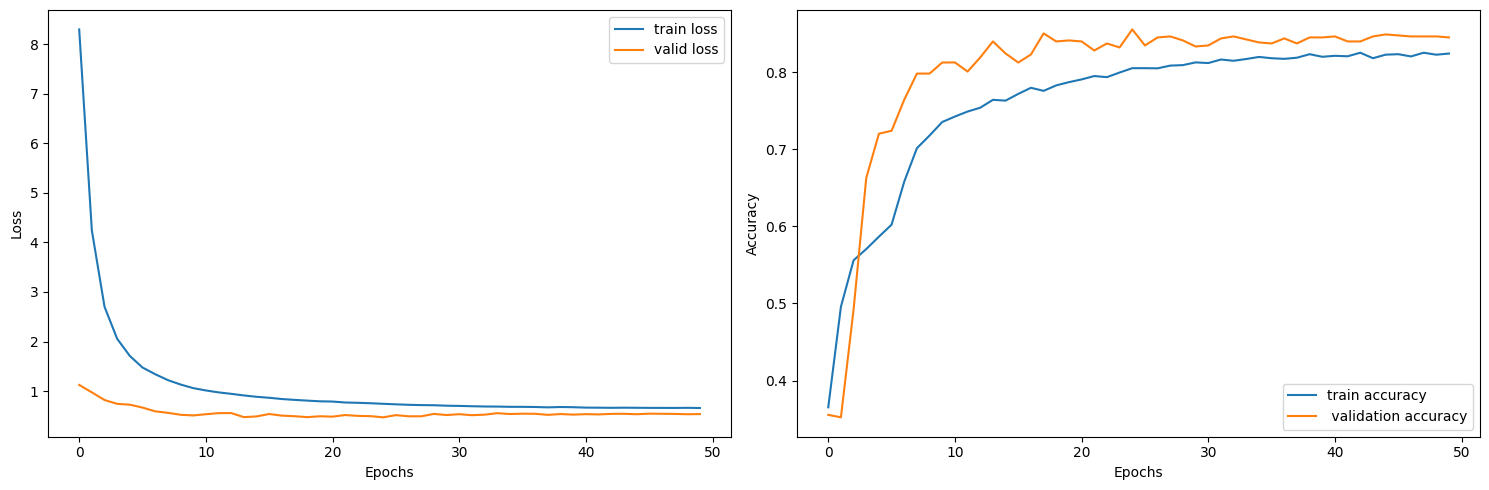

In [4]:
loss_and_acc_plots(vit_s16_model_results, save_result=True)

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/torch/nn/modules/module.py:1898: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


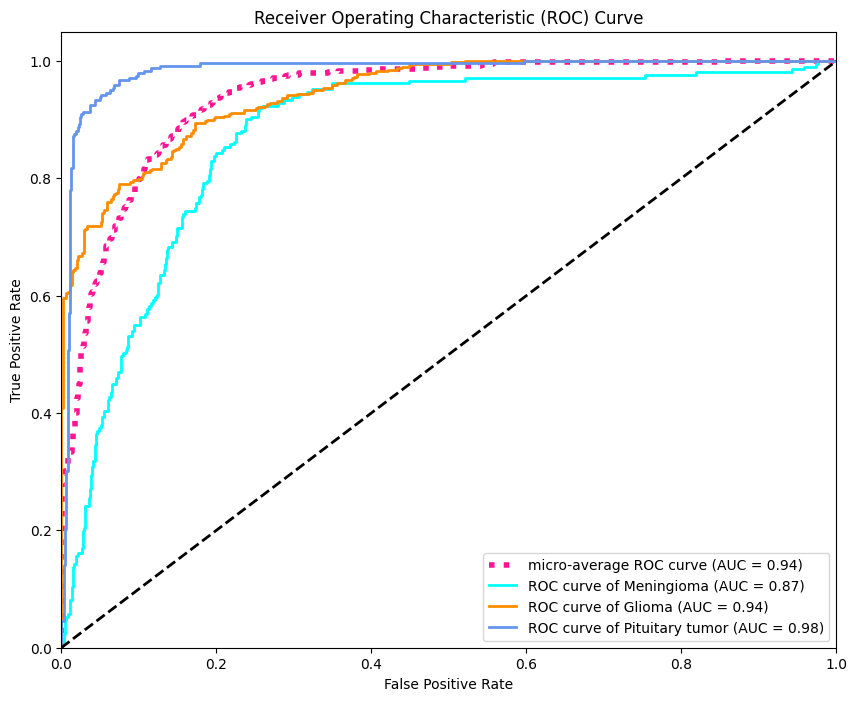

AUC Scores:
Meningioma: 0.8726
Glioma: 0.9440
Pituitary tumor: 0.9832
Micro-average: 0.9393


In [10]:
vit_s16_model.state_dict(torch.load("/home/aa23798/Project/best_model.pth"))
plot_roc_auc(vit_s16_model, test_dataloader, device)

Test Accuracy: 0.8270
Test Precision: 0.8335
Test Recall: 0.8203
Test F1 Score: 0.8241
Test Sensitivity: 0.8203


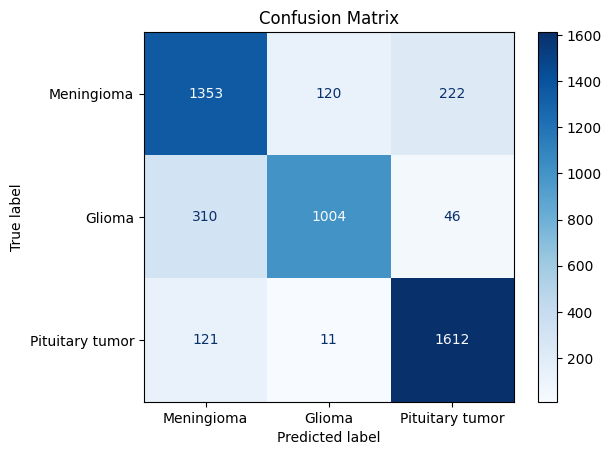

In [11]:
Model_evaluate(vit_s16_model,train_dataloader)

Test Accuracy: 0.8451
Test Precision: 0.8344
Test Recall: 0.8470
Test F1 Score: 0.8324
Test Sensitivity: 0.8470


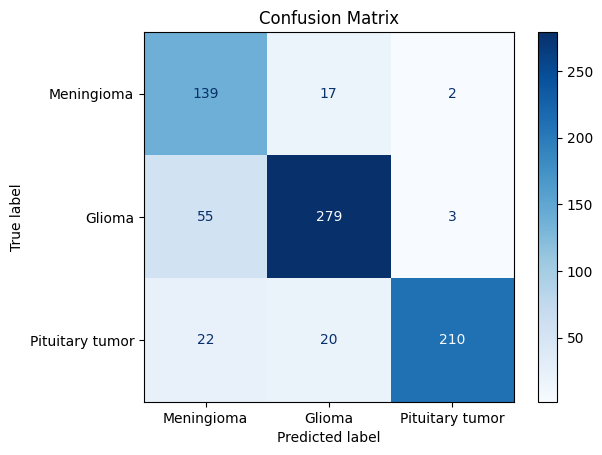

In [12]:
Model_evaluate(vit_s16_model,valid_dataloader)

Test Accuracy: 0.8194
Test Precision: 0.8104
Test Recall: 0.8247
Test F1 Score: 0.8139
Test Sensitivity: 0.8247


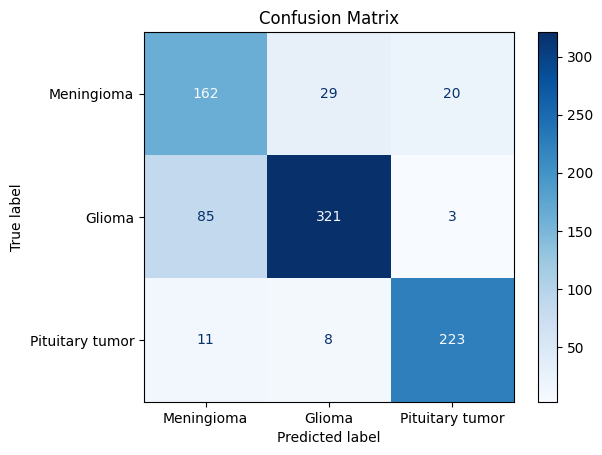

In [13]:
Model_evaluate(vit_s16_model,test_dataloader)

## ViT B8

In [36]:
class ViT_B8(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.vitb8= create_model('vit_base_patch8_224', pretrained=True)
        self.vitb8.head = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self,x):
        return self.vitb8(x)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear Python memory
gc.collect()
   
vit_B8_model = ViT_B8(num_classes=3)

device = "cuda" if torch.cuda.is_available() else "cpu"

optimizer = torch.optim.Adam(params=vit_B8_model.parameters(),
                             lr=1e-3,weight_decay=1e-4)

vit_B8_model = vit_B8_model.to(device)

scheduler = ExponentialLR(optimizer, gamma=0.9)

loss_fn = torch.nn.CrossEntropyLoss()

vit_B8_model_results = train(model=vit_B8_model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,scheduler=scheduler, early_stopping=True,
                             patience=10,use_multiple_gpus=True)


Using 3 GPUs


  0%|                                                                  | 0/50 [00:00<?, ?it/s]/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  2%|█                                                      | 1/50 [03:12<2:36:56, 192.17s/it]


Epoch 1, Training Loss: 8.4986, Training Accuracy: 0.4616, Training Precision: 0.4465, Training Recall: 0.4489, Training F1: 0.4398, Test Loss: 0.9115, Test Accuracy: 0.5195, Test Precision: 0.3567, Test Recall: 0.6086, Test F1: 0.4366, Test Sensitivity: 0.6086


  4%|██▏                                                    | 2/50 [06:26<2:34:47, 193.49s/it]


Epoch 2, Training Loss: 3.2477, Training Accuracy: 0.5760, Training Precision: 0.5566, Training Recall: 0.5571, Training F1: 0.5488, Test Loss: 0.6875, Test Accuracy: 0.7122, Test Precision: 0.6427, Test Recall: 0.6466, Test F1: 0.6367, Test Sensitivity: 0.6466


  6%|███▎                                                   | 3/50 [09:38<2:31:02, 192.81s/it]


Epoch 3, Training Loss: 2.5288, Training Accuracy: 0.6379, Training Precision: 0.6316, Training Recall: 0.6248, Training F1: 0.6237, Test Loss: 0.8782, Test Accuracy: 0.6005, Test Precision: 0.6040, Test Recall: 0.5163, Test F1: 0.5311, Test Sensitivity: 0.5163


  8%|████▍                                                  | 4/50 [12:47<2:26:42, 191.36s/it]


Epoch 4, Training Loss: 2.2338, Training Accuracy: 0.6881, Training Precision: 0.7012, Training Recall: 0.6735, Training F1: 0.6756, Test Loss: 0.5690, Test Accuracy: 0.7879, Test Precision: 0.7861, Test Recall: 0.7932, Test F1: 0.7767, Test Sensitivity: 0.7932


 10%|█████▌                                                 | 5/50 [15:55<2:22:27, 189.94s/it]


Epoch 5, Training Loss: 2.0141, Training Accuracy: 0.7360, Training Precision: 0.7536, Training Recall: 0.7230, Training F1: 0.7270, Test Loss: 0.6359, Test Accuracy: 0.7476, Test Precision: 0.7767, Test Recall: 0.7596, Test F1: 0.7405, Test Sensitivity: 0.7596


 12%|██████▌                                                | 6/50 [19:07<2:19:46, 190.61s/it]


Epoch 6, Training Loss: 1.8744, Training Accuracy: 0.7539, Training Precision: 0.7668, Training Recall: 0.7432, Training F1: 0.7476, Test Loss: 0.4411, Test Accuracy: 0.8372, Test Precision: 0.8159, Test Recall: 0.8366, Test F1: 0.8222, Test Sensitivity: 0.8366


 14%|███████▋                                               | 7/50 [22:18<2:16:53, 191.01s/it]


Epoch 7, Training Loss: 1.7569, Training Accuracy: 0.7593, Training Precision: 0.7753, Training Recall: 0.7479, Training F1: 0.7527, Test Loss: 0.5064, Test Accuracy: 0.8411, Test Precision: 0.8305, Test Recall: 0.8098, Test F1: 0.8176, Test Sensitivity: 0.8098


 16%|████████▊                                              | 8/50 [25:26<2:12:57, 189.93s/it]


Epoch 8, Training Loss: 1.6708, Training Accuracy: 0.7771, Training Precision: 0.7906, Training Recall: 0.7669, Training F1: 0.7719, Test Loss: 0.4489, Test Accuracy: 0.8438, Test Precision: 0.8268, Test Recall: 0.8267, Test F1: 0.8260, Test Sensitivity: 0.8267


 18%|█████████▉                                             | 9/50 [28:41<2:10:45, 191.36s/it]


Epoch 9, Training Loss: 1.5899, Training Accuracy: 0.7868, Training Precision: 0.7978, Training Recall: 0.7773, Training F1: 0.7820, Test Loss: 0.5592, Test Accuracy: 0.8411, Test Precision: 0.8330, Test Recall: 0.8199, Test F1: 0.8243, Test Sensitivity: 0.8199


 20%|██████████▊                                           | 10/50 [31:51<2:07:20, 191.01s/it]


Epoch 10, Training Loss: 1.5226, Training Accuracy: 0.7960, Training Precision: 0.8099, Training Recall: 0.7863, Training F1: 0.7918, Test Loss: 0.4918, Test Accuracy: 0.8529, Test Precision: 0.8379, Test Recall: 0.8368, Test F1: 0.8351, Test Sensitivity: 0.8368


 22%|███████████▉                                          | 11/50 [35:04<2:04:36, 191.71s/it]


Epoch 11, Training Loss: 1.4510, Training Accuracy: 0.8083, Training Precision: 0.8209, Training Recall: 0.7988, Training F1: 0.8041, Test Loss: 0.4673, Test Accuracy: 0.8359, Test Precision: 0.8220, Test Recall: 0.8489, Test F1: 0.8253, Test Sensitivity: 0.8489


 24%|████████████▉                                         | 12/50 [38:11<2:00:28, 190.22s/it]


Epoch 12, Training Loss: 1.4015, Training Accuracy: 0.8198, Training Precision: 0.8348, Training Recall: 0.8103, Training F1: 0.8161, Test Loss: 0.4507, Test Accuracy: 0.8594, Test Precision: 0.8438, Test Recall: 0.8583, Test F1: 0.8469, Test Sensitivity: 0.8583


 26%|██████████████                                        | 13/50 [41:25<1:57:59, 191.33s/it]


Epoch 13, Training Loss: 1.3643, Training Accuracy: 0.8245, Training Precision: 0.8371, Training Recall: 0.8152, Training F1: 0.8205, Test Loss: 0.4572, Test Accuracy: 0.8477, Test Precision: 0.8330, Test Recall: 0.8535, Test F1: 0.8361, Test Sensitivity: 0.8535


 28%|███████████████                                       | 14/50 [44:39<1:55:20, 192.25s/it]


Epoch 14, Training Loss: 1.3187, Training Accuracy: 0.8302, Training Precision: 0.8468, Training Recall: 0.8201, Training F1: 0.8262, Test Loss: 0.4971, Test Accuracy: 0.8542, Test Precision: 0.8444, Test Recall: 0.8291, Test F1: 0.8354, Test Sensitivity: 0.8291


 30%|████████████████▏                                     | 15/50 [47:54<1:52:33, 192.97s/it]


Epoch 15, Training Loss: 1.2845, Training Accuracy: 0.8350, Training Precision: 0.8490, Training Recall: 0.8253, Training F1: 0.8309, Test Loss: 0.4297, Test Accuracy: 0.8672, Test Precision: 0.8503, Test Recall: 0.8561, Test F1: 0.8526, Test Sensitivity: 0.8561


 32%|█████████████████▎                                    | 16/50 [51:16<1:50:51, 195.65s/it]


Epoch 16, Training Loss: 1.2389, Training Accuracy: 0.8458, Training Precision: 0.8601, Training Recall: 0.8364, Training F1: 0.8422, Test Loss: 0.4627, Test Accuracy: 0.8516, Test Precision: 0.8382, Test Recall: 0.8546, Test F1: 0.8395, Test Sensitivity: 0.8546


 34%|██████████████████▎                                   | 17/50 [54:31<1:47:37, 195.68s/it]


Epoch 17, Training Loss: 1.2129, Training Accuracy: 0.8487, Training Precision: 0.8636, Training Recall: 0.8391, Training F1: 0.8450, Test Loss: 0.4980, Test Accuracy: 0.8555, Test Precision: 0.8400, Test Recall: 0.8476, Test F1: 0.8411, Test Sensitivity: 0.8476


 36%|███████████████████▍                                  | 18/50 [57:46<1:44:07, 195.23s/it]


Epoch 18, Training Loss: 1.1876, Training Accuracy: 0.8516, Training Precision: 0.8662, Training Recall: 0.8422, Training F1: 0.8480, Test Loss: 0.5579, Test Accuracy: 0.8607, Test Precision: 0.8504, Test Recall: 0.8417, Test F1: 0.8441, Test Sensitivity: 0.8417


 38%|███████████████████▊                                | 19/50 [1:00:58<1:40:22, 194.28s/it]


Epoch 19, Training Loss: 1.1648, Training Accuracy: 0.8547, Training Precision: 0.8689, Training Recall: 0.8451, Training F1: 0.8509, Test Loss: 0.5899, Test Accuracy: 0.8581, Test Precision: 0.8436, Test Recall: 0.8349, Test F1: 0.8383, Test Sensitivity: 0.8349


 40%|████████████████████▊                               | 20/50 [1:04:12<1:37:09, 194.33s/it]


Epoch 20, Training Loss: 1.1452, Training Accuracy: 0.8610, Training Precision: 0.8727, Training Recall: 0.8525, Training F1: 0.8578, Test Loss: 0.4712, Test Accuracy: 0.8542, Test Precision: 0.8360, Test Recall: 0.8493, Test F1: 0.8404, Test Sensitivity: 0.8493


 42%|█████████████████████▊                              | 21/50 [1:07:30<1:34:26, 195.41s/it]


Epoch 21, Training Loss: 1.1212, Training Accuracy: 0.8641, Training Precision: 0.8775, Training Recall: 0.8544, Training F1: 0.8599, Test Loss: 0.5284, Test Accuracy: 0.8607, Test Precision: 0.8465, Test Recall: 0.8520, Test F1: 0.8464, Test Sensitivity: 0.8520


 44%|██████████████████████▉                             | 22/50 [1:10:44<1:31:02, 195.09s/it]


Epoch 22, Training Loss: 1.1040, Training Accuracy: 0.8719, Training Precision: 0.8841, Training Recall: 0.8630, Training F1: 0.8684, Test Loss: 0.4836, Test Accuracy: 0.8568, Test Precision: 0.8405, Test Recall: 0.8492, Test F1: 0.8421, Test Sensitivity: 0.8492


 46%|███████████████████████▉                            | 23/50 [1:13:56<1:27:21, 194.15s/it]


Epoch 23, Training Loss: 1.0888, Training Accuracy: 0.8729, Training Precision: 0.8852, Training Recall: 0.8641, Training F1: 0.8695, Test Loss: 0.4534, Test Accuracy: 0.8398, Test Precision: 0.8366, Test Recall: 0.8563, Test F1: 0.8303, Test Sensitivity: 0.8563


 48%|████████████████████████▉                           | 24/50 [1:17:09<1:23:54, 193.62s/it]


Epoch 24, Training Loss: 1.0652, Training Accuracy: 0.8787, Training Precision: 0.8900, Training Recall: 0.8700, Training F1: 0.8753, Test Loss: 0.5120, Test Accuracy: 0.8424, Test Precision: 0.8334, Test Recall: 0.8519, Test F1: 0.8314, Test Sensitivity: 0.8519


 48%|████████████████████████▉                           | 24/50 [1:20:28<1:27:10, 201.18s/it]

Early stopping at epoch 25


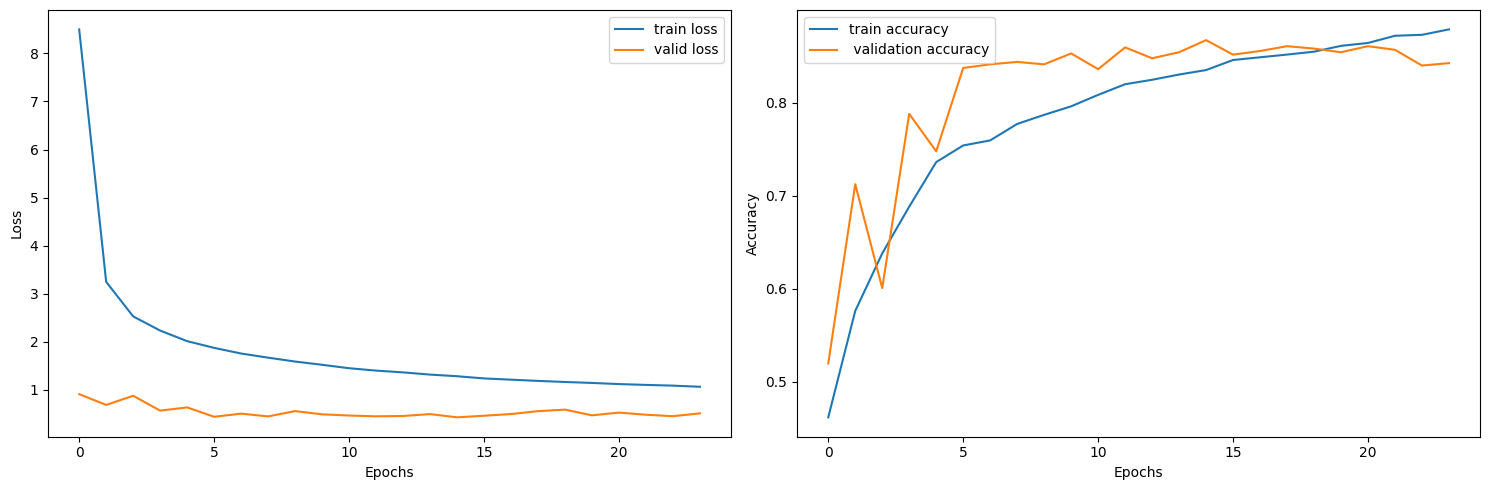

In [37]:
loss_and_acc_plots(vit_B8_model_results, save_result=True)

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/torch/nn/modules/module.py:1898: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


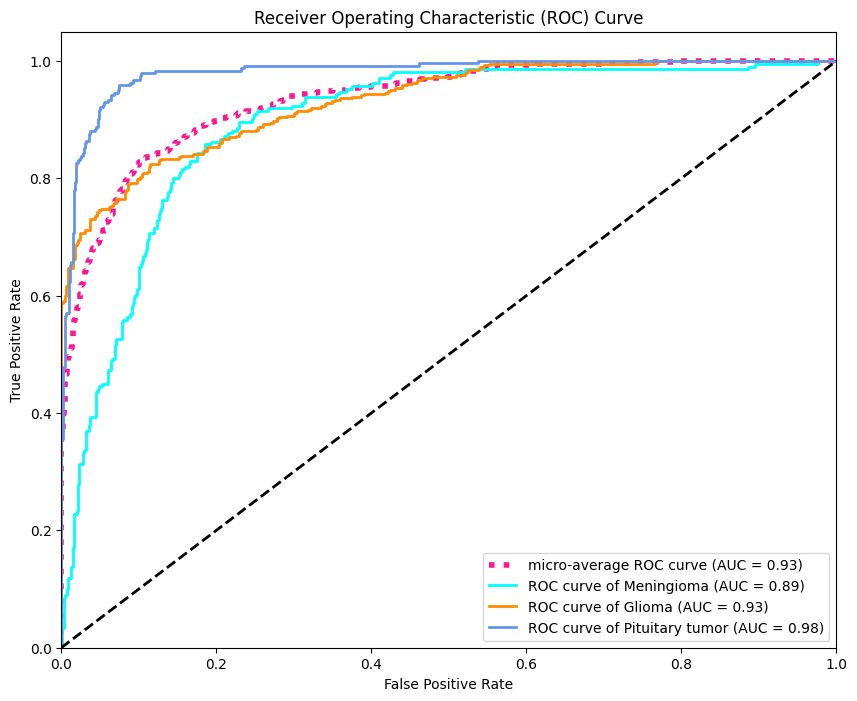

AUC Scores:
Meningioma: 0.8940
Glioma: 0.9313
Pituitary tumor: 0.9811
Micro-average: 0.9349


In [38]:
vit_B8_model.state_dict(torch.load("/home/aa23798/Project/best_model.pth"))
plot_roc_auc(vit_B8_model, test_dataloader, device)

Test Accuracy: 0.8858
Test Precision: 0.8919
Test Recall: 0.8789
Test F1 Score: 0.8829
Test Sensitivity: 0.8789


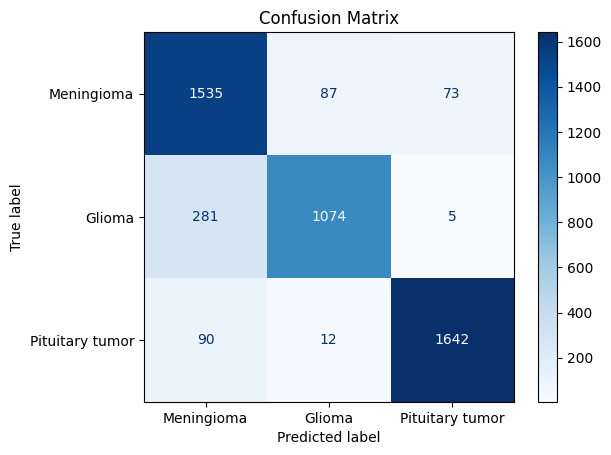

In [39]:
Model_evaluate(vit_B8_model,train_dataloader)

Test Accuracy: 0.8398
Test Precision: 0.8235
Test Recall: 0.8158
Test F1 Score: 0.8176
Test Sensitivity: 0.8158


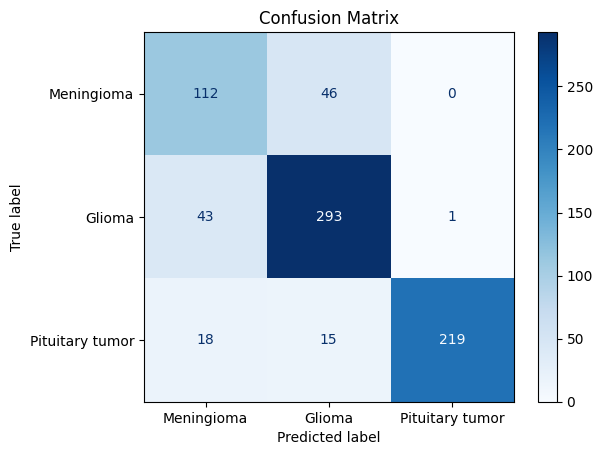

In [40]:
Model_evaluate(vit_B8_model,valid_dataloader)

Test Accuracy: 0.8029
Test Precision: 0.8023
Test Recall: 0.8038
Test F1 Score: 0.7979
Test Sensitivity: 0.8038


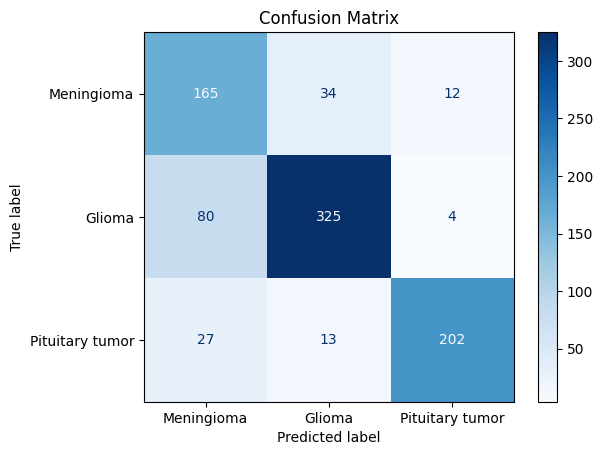

In [41]:
Model_evaluate(vit_B8_model,test_dataloader) 

## ViT B16 

In [29]:
class ViT_B16(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.vitb16= create_model('vit_base_patch16_224', pretrained=True)
        self.vitb16.head = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self,x):
        return self.vitb16(x)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear Python memory
gc.collect()
   
ViT_B16_model = ViT_B16(num_classes=3)

device = "cuda" if torch.cuda.is_available() else "cpu"

optimizer = torch.optim.Adam(params=ViT_B16_model.parameters(),
                             lr=1e-3,weight_decay=1e-4)

ViT_B16_model = ViT_B16_model.to(device)

scheduler = ExponentialLR(optimizer, gamma=0.9)

loss_fn = torch.nn.CrossEntropyLoss()

ViT_B16_model_results = train(model=ViT_B16_model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,scheduler=scheduler, early_stopping=True,
                            patience=10,use_multiple_gpus=True)


Using 3 GPUs


  2%|█                                                      | 1/50 [01:49<1:29:43, 109.87s/it]


Epoch 1, Training Loss: 9.4492, Training Accuracy: 0.4458, Training Precision: 0.4301, Training Recall: 0.4349, Training F1: 0.4299, Test Loss: 0.8245, Test Accuracy: 0.5820, Test Precision: 0.6084, Test Recall: 0.6145, Test F1: 0.5612, Test Sensitivity: 0.6145


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  4%|██▏                                                    | 2/50 [03:42<1:29:17, 111.62s/it]


Epoch 2, Training Loss: 3.8395, Training Accuracy: 0.5509, Training Precision: 0.5195, Training Recall: 0.5281, Training F1: 0.5130, Test Loss: 0.8109, Test Accuracy: 0.5013, Test Precision: 0.3927, Test Recall: 0.6050, Test F1: 0.4386, Test Sensitivity: 0.6050


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  6%|███▎                                                   | 3/50 [05:38<1:29:01, 113.64s/it]


Epoch 3, Training Loss: 2.7619, Training Accuracy: 0.5799, Training Precision: 0.5603, Training Recall: 0.5618, Training F1: 0.5551, Test Loss: 0.7507, Test Accuracy: 0.5130, Test Precision: 0.3589, Test Recall: 0.5981, Test F1: 0.4335, Test Sensitivity: 0.5981


  8%|████▍                                                  | 4/50 [07:32<1:27:14, 113.80s/it]


Epoch 4, Training Loss: 2.3540, Training Accuracy: 0.5874, Training Precision: 0.5675, Training Recall: 0.5664, Training F1: 0.5579, Test Loss: 0.7264, Test Accuracy: 0.6523, Test Precision: 0.5721, Test Recall: 0.5925, Test F1: 0.5803, Test Sensitivity: 0.5925


 10%|█████▌                                                 | 5/50 [09:21<1:24:00, 112.00s/it]


Epoch 5, Training Loss: 2.1198, Training Accuracy: 0.6016, Training Precision: 0.5862, Training Recall: 0.5837, Training F1: 0.5797, Test Loss: 0.7160, Test Accuracy: 0.6667, Test Precision: 0.5758, Test Recall: 0.5808, Test F1: 0.5745, Test Sensitivity: 0.5808


 12%|██████▌                                                | 6/50 [11:13<1:21:59, 111.80s/it]


Epoch 6, Training Loss: 1.9771, Training Accuracy: 0.6704, Training Precision: 0.6665, Training Recall: 0.6594, Training F1: 0.6600, Test Loss: 0.5300, Test Accuracy: 0.7930, Test Precision: 0.7830, Test Recall: 0.8117, Test F1: 0.7804, Test Sensitivity: 0.8117


 14%|███████▋                                               | 7/50 [13:04<1:20:05, 111.75s/it]


Epoch 7, Training Loss: 1.8377, Training Accuracy: 0.6958, Training Precision: 0.7198, Training Recall: 0.6785, Training F1: 0.6802, Test Loss: 0.5190, Test Accuracy: 0.8216, Test Precision: 0.8055, Test Recall: 0.8376, Test F1: 0.8101, Test Sensitivity: 0.8376


 16%|████████▊                                              | 8/50 [14:59<1:18:59, 112.84s/it]


Epoch 8, Training Loss: 1.7395, Training Accuracy: 0.7114, Training Precision: 0.7343, Training Recall: 0.6947, Training F1: 0.6970, Test Loss: 0.5894, Test Accuracy: 0.7565, Test Precision: 0.7765, Test Recall: 0.7782, Test F1: 0.7462, Test Sensitivity: 0.7782


 18%|█████████▉                                             | 9/50 [16:52<1:17:02, 112.76s/it]


Epoch 9, Training Loss: 1.6398, Training Accuracy: 0.7308, Training Precision: 0.7532, Training Recall: 0.7146, Training F1: 0.7179, Test Loss: 0.5171, Test Accuracy: 0.8138, Test Precision: 0.8072, Test Recall: 0.8319, Test F1: 0.8032, Test Sensitivity: 0.8319


 20%|██████████▊                                           | 10/50 [18:42<1:14:38, 111.96s/it]


Epoch 10, Training Loss: 1.5756, Training Accuracy: 0.7506, Training Precision: 0.7658, Training Recall: 0.7386, Training F1: 0.7434, Test Loss: 0.5472, Test Accuracy: 0.7943, Test Precision: 0.7793, Test Recall: 0.7941, Test F1: 0.7791, Test Sensitivity: 0.7941


 22%|███████████▉                                          | 11/50 [20:33<1:12:32, 111.60s/it]


Epoch 11, Training Loss: 1.5258, Training Accuracy: 0.7508, Training Precision: 0.7753, Training Recall: 0.7358, Training F1: 0.7404, Test Loss: 0.5291, Test Accuracy: 0.8008, Test Precision: 0.7806, Test Recall: 0.7829, Test F1: 0.7801, Test Sensitivity: 0.7829


 24%|████████████▉                                         | 12/50 [22:25<1:10:48, 111.82s/it]


Epoch 12, Training Loss: 1.4644, Training Accuracy: 0.7637, Training Precision: 0.7730, Training Recall: 0.7532, Training F1: 0.7575, Test Loss: 0.4509, Test Accuracy: 0.8281, Test Precision: 0.8049, Test Recall: 0.8251, Test F1: 0.8117, Test Sensitivity: 0.8251


 26%|██████████████                                        | 13/50 [24:18<1:09:05, 112.04s/it]


Epoch 13, Training Loss: 1.4221, Training Accuracy: 0.7658, Training Precision: 0.7809, Training Recall: 0.7543, Training F1: 0.7594, Test Loss: 0.5703, Test Accuracy: 0.8086, Test Precision: 0.7967, Test Recall: 0.7880, Test F1: 0.7888, Test Sensitivity: 0.7880


 28%|███████████████                                       | 14/50 [26:12<1:07:32, 112.57s/it]


Epoch 14, Training Loss: 1.3689, Training Accuracy: 0.7789, Training Precision: 0.7967, Training Recall: 0.7669, Training F1: 0.7724, Test Loss: 0.4538, Test Accuracy: 0.8216, Test Precision: 0.8183, Test Recall: 0.8399, Test F1: 0.8117, Test Sensitivity: 0.8399


 30%|████████████████▏                                     | 15/50 [28:04<1:05:35, 112.45s/it]


Epoch 15, Training Loss: 1.3411, Training Accuracy: 0.7855, Training Precision: 0.8016, Training Recall: 0.7744, Training F1: 0.7797, Test Loss: 0.4863, Test Accuracy: 0.8255, Test Precision: 0.8140, Test Recall: 0.8279, Test F1: 0.8135, Test Sensitivity: 0.8279


 32%|█████████████████▎                                    | 16/50 [29:54<1:03:22, 111.84s/it]


Epoch 16, Training Loss: 1.3062, Training Accuracy: 0.7916, Training Precision: 0.8093, Training Recall: 0.7790, Training F1: 0.7842, Test Loss: 0.4598, Test Accuracy: 0.8333, Test Precision: 0.8194, Test Recall: 0.8152, Test F1: 0.8149, Test Sensitivity: 0.8152


 34%|██████████████████▎                                   | 17/50 [31:45<1:01:18, 111.48s/it]


Epoch 17, Training Loss: 1.2704, Training Accuracy: 0.7977, Training Precision: 0.8136, Training Recall: 0.7865, Training F1: 0.7920, Test Loss: 0.4924, Test Accuracy: 0.8346, Test Precision: 0.8182, Test Recall: 0.8191, Test F1: 0.8158, Test Sensitivity: 0.8191


 36%|████████████████████▏                                   | 18/50 [33:38<59:47, 112.10s/it]


Epoch 18, Training Loss: 1.2408, Training Accuracy: 0.8033, Training Precision: 0.8153, Training Recall: 0.7930, Training F1: 0.7980, Test Loss: 0.4906, Test Accuracy: 0.8490, Test Precision: 0.8359, Test Recall: 0.8262, Test F1: 0.8276, Test Sensitivity: 0.8262


 38%|█████████████████████▎                                  | 19/50 [35:32<58:10, 112.59s/it]


Epoch 19, Training Loss: 1.2212, Training Accuracy: 0.8116, Training Precision: 0.8254, Training Recall: 0.8016, Training F1: 0.8071, Test Loss: 0.4636, Test Accuracy: 0.8542, Test Precision: 0.8374, Test Recall: 0.8537, Test F1: 0.8409, Test Sensitivity: 0.8537


 40%|██████████████████████▍                                 | 20/50 [37:24<56:16, 112.54s/it]


Epoch 20, Training Loss: 1.1927, Training Accuracy: 0.8153, Training Precision: 0.8289, Training Recall: 0.8052, Training F1: 0.8106, Test Loss: 0.5339, Test Accuracy: 0.8451, Test Precision: 0.8340, Test Recall: 0.8407, Test F1: 0.8311, Test Sensitivity: 0.8407


 42%|███████████████████████▌                                | 21/50 [39:18<54:31, 112.80s/it]


Epoch 21, Training Loss: 1.1671, Training Accuracy: 0.8206, Training Precision: 0.8330, Training Recall: 0.8103, Training F1: 0.8154, Test Loss: 0.4956, Test Accuracy: 0.8438, Test Precision: 0.8295, Test Recall: 0.8427, Test F1: 0.8298, Test Sensitivity: 0.8427


 42%|███████████████████████▌                                | 21/50 [41:10<56:51, 117.64s/it]

Early stopping at epoch 22


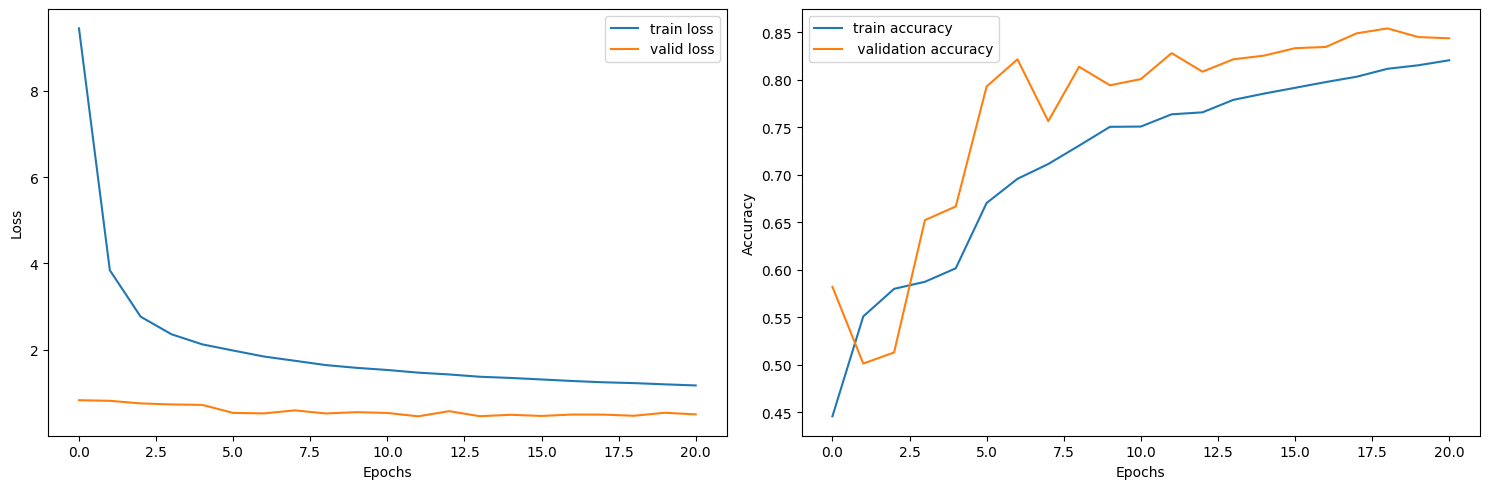

In [30]:
loss_and_acc_plots(ViT_B16_model_results, save_result=True)

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/torch/nn/modules/module.py:1898: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


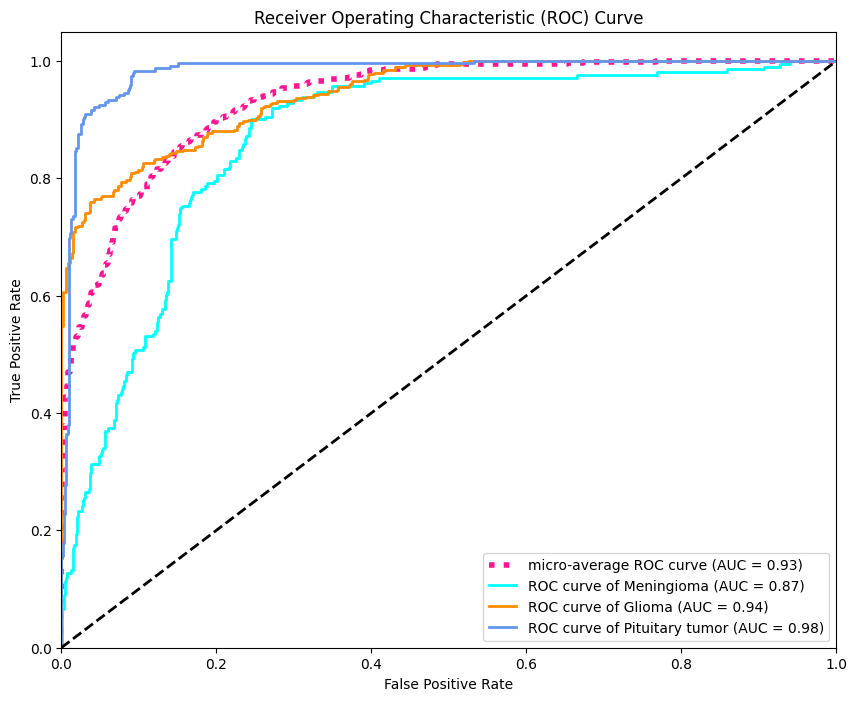

AUC Scores:
Meningioma: 0.8695
Glioma: 0.9437
Pituitary tumor: 0.9825
Micro-average: 0.9342


In [32]:
ViT_B16_model.state_dict(torch.load("/home/aa23798/Project/best_model.pth"))
plot_roc_auc(ViT_B16_model, test_dataloader, device)

Test Accuracy: 0.8266
Test Precision: 0.8460
Test Recall: 0.8144
Test F1 Score: 0.8202
Test Sensitivity: 0.8144


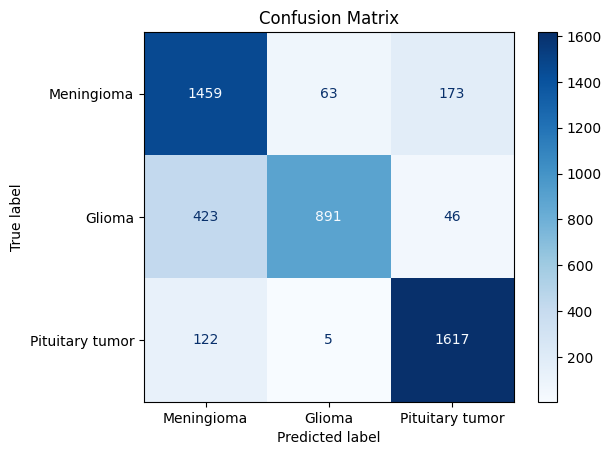

In [33]:
Model_evaluate(ViT_B16_model,train_dataloader)

Test Accuracy: 0.8281
Test Precision: 0.8136
Test Recall: 0.8202
Test F1 Score: 0.8122
Test Sensitivity: 0.8202


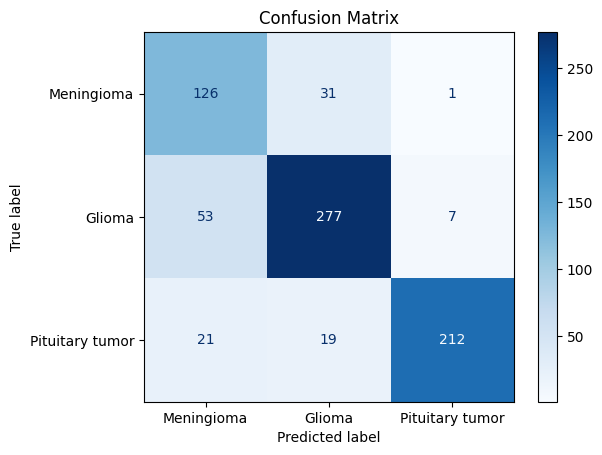

In [34]:
Model_evaluate(ViT_B16_model,valid_dataloader)

Test Accuracy: 0.8003
Test Precision: 0.8158
Test Recall: 0.8123
Test F1 Score: 0.7990
Test Sensitivity: 0.8123


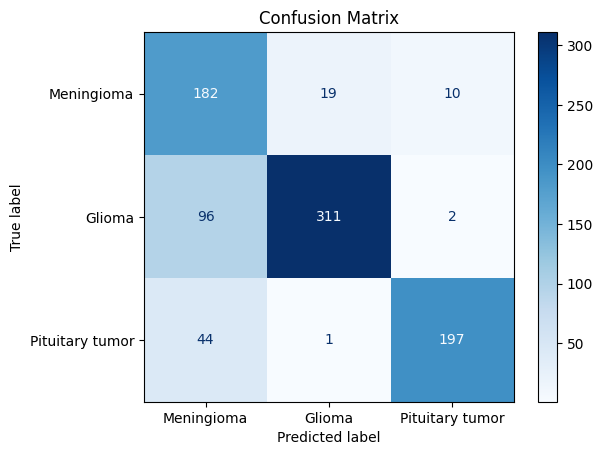

In [35]:
Model_evaluate(ViT_B16_model,test_dataloader)

## ViT S16 Dino

In [99]:
class ViTS16_Dino(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.Dino = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')
        self.head = nn.Sequential(
            nn.Linear(384, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        features = self.Dino(x)
        return self.head(features)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear Python memory
gc.collect()

ViTS16_Dino_Model = ViTS16_Dino(3)

device = "cuda" if torch.cuda.is_available() else "cpu"

optimizer = torch.optim.Adam(params=ViTS16_Dino_Model.parameters(),
                             lr=1e-3,weight_decay=1e-4)

ViTS16_Dino_Model = ViTS16_Dino_Model.to(device)

scheduler = ExponentialLR(optimizer, gamma=0.9)

loss_fn = torch.nn.CrossEntropyLoss()

ViTS16_Dino_results = train(model=ViTS16_Dino_Model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,scheduler=scheduler, early_stopping=True,
                            patience=10,use_multiple_gpus=True)

Using cache found in /home/aa23798/.cache/torch/hub/facebookresearch_dino_main


Using 3 GPUs


  0%|                                                                  | 0/50 [00:00<?, ?it/s]/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  2%|█                                                       | 1/50 [01:25<1:09:35, 85.21s/it]


Epoch 1, Training Loss: 3.3140, Training Accuracy: 0.3528, Training Precision: 0.3347, Training Recall: 0.3354, Training F1: 0.3141, Test Loss: 1.0950, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  4%|██▏                                                     | 2/50 [02:50<1:08:03, 85.08s/it]


Epoch 2, Training Loss: 2.5174, Training Accuracy: 0.3580, Training Precision: 0.3049, Training Recall: 0.3298, Training F1: 0.2054, Test Loss: 1.1152, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  6%|███▎                                                    | 3/50 [04:14<1:06:11, 84.50s/it]


Epoch 3, Training Loss: 2.1703, Training Accuracy: 0.3571, Training Precision: 0.3190, Training Recall: 0.3285, Training F1: 0.2186, Test Loss: 1.1175, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  8%|████▍                                                   | 4/50 [05:36<1:04:03, 83.56s/it]


Epoch 4, Training Loss: 1.9786, Training Accuracy: 0.3645, Training Precision: 0.2983, Training Recall: 0.3357, Training F1: 0.2340, Test Loss: 1.1341, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 10%|█████▌                                                  | 5/50 [07:01<1:03:08, 84.19s/it]


Epoch 5, Training Loss: 1.8720, Training Accuracy: 0.3590, Training Precision: 0.3420, Training Recall: 0.3323, Training F1: 0.2330, Test Loss: 1.1253, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 12%|██████▋                                                 | 6/50 [08:23<1:01:15, 83.54s/it]


Epoch 6, Training Loss: 1.7978, Training Accuracy: 0.3590, Training Precision: 0.3338, Training Recall: 0.3320, Training F1: 0.2390, Test Loss: 1.1304, Test Accuracy: 0.2057, Test Precision: 0.0705, Test Recall: 0.3333, Test F1: 0.1164, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 14%|████████                                                  | 7/50 [09:44<59:17, 82.73s/it]


Epoch 7, Training Loss: 1.7480, Training Accuracy: 0.3655, Training Precision: 0.2501, Training Recall: 0.3356, Training F1: 0.1996, Test Loss: 1.1263, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 16%|█████████▎                                                | 8/50 [11:06<57:45, 82.51s/it]


Epoch 8, Training Loss: 1.7028, Training Accuracy: 0.3640, Training Precision: 0.2430, Training Recall: 0.3342, Training F1: 0.1960, Test Loss: 1.1276, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 18%|██████████▍                                               | 9/50 [12:26<55:50, 81.73s/it]


Epoch 9, Training Loss: 1.6788, Training Accuracy: 0.3611, Training Precision: 0.2697, Training Recall: 0.3326, Training F1: 0.2380, Test Loss: 1.1251, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|███████████▍                                             | 10/50 [13:44<53:38, 80.47s/it]


Epoch 10, Training Loss: 1.6493, Training Accuracy: 0.3645, Training Precision: 0.2469, Training Recall: 0.3348, Training F1: 0.2086, Test Loss: 1.1261, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|███████████                                            | 10/50 [15:06<1:00:26, 90.65s/it]

Early stopping at epoch 11


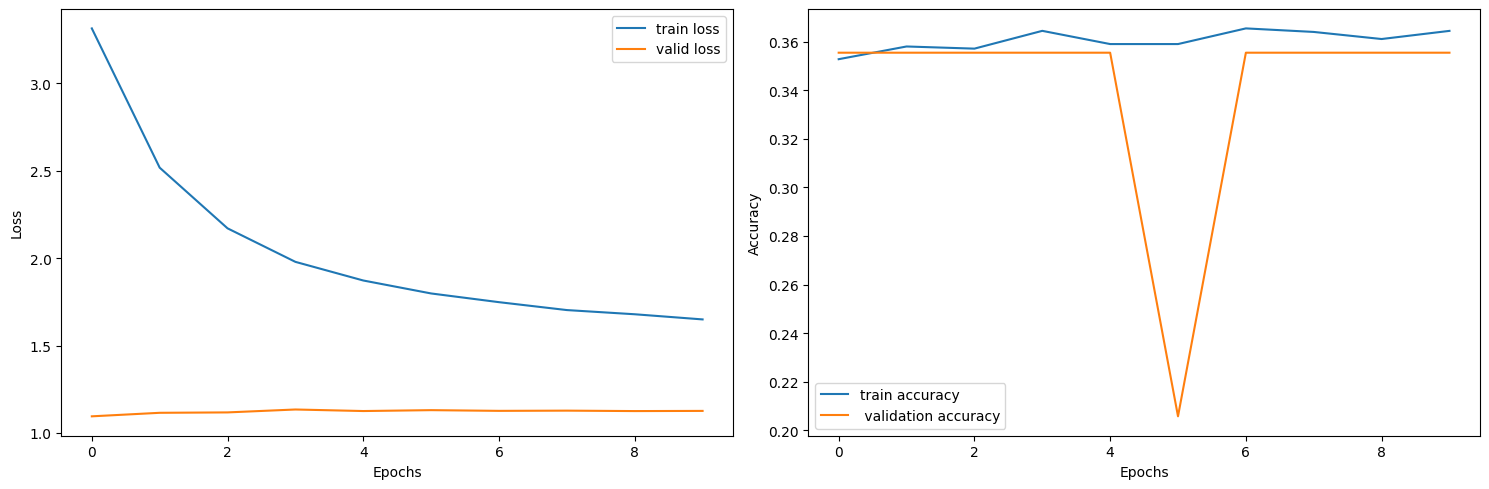

In [100]:
loss_and_acc_plots(ViTS16_Dino_results, save_result=True)

In [101]:
os.makedirs("/home/aa23798/Project/Best Models/ViTS16_Dino/", exist_ok=True)

In [102]:
!cp "best_model.pth" "/home/aa23798/Project/Best Models/ViTS16_Dino/"
!cp "Result.csv" "/home/aa23798/Project/Best Models/ViTS16_Dino/"

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/torch/nn/modules/module.py:1898: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


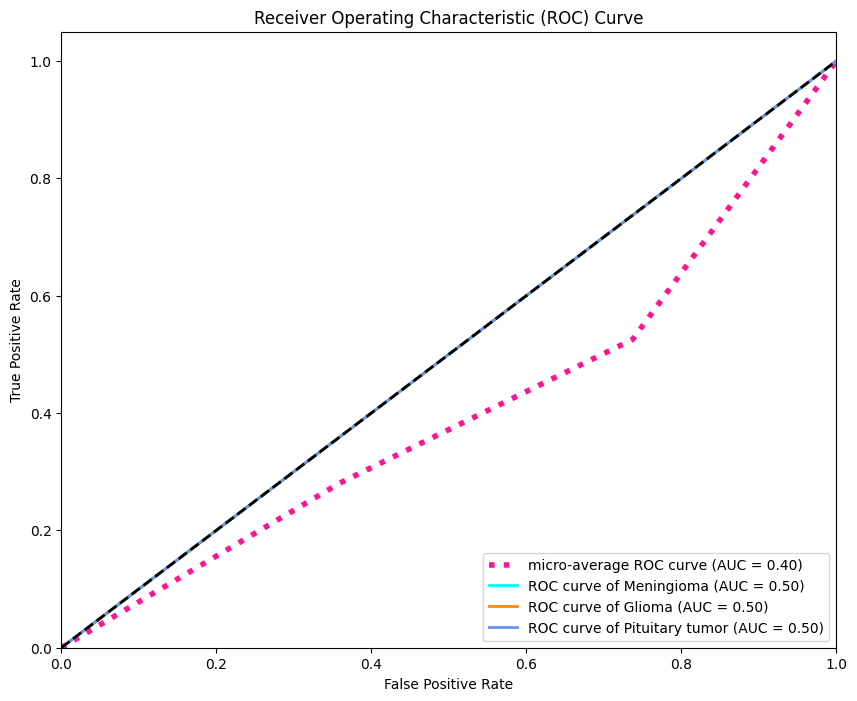

AUC Scores:
Meningioma: 0.5000
Glioma: 0.5000
Pituitary tumor: 0.5000
Micro-average: 0.4031


In [110]:
ViTS16_Dino_Model.state_dict(torch.load("/home/aa23798/Project/best_model.pth"))
plot_roc_auc(ViTS16_Dino_Model, test_dataloader, device)

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.3634
Test Precision: 0.1211
Test Recall: 0.3333
Test F1 Score: 0.1777
Test Sensitivity: 0.3333


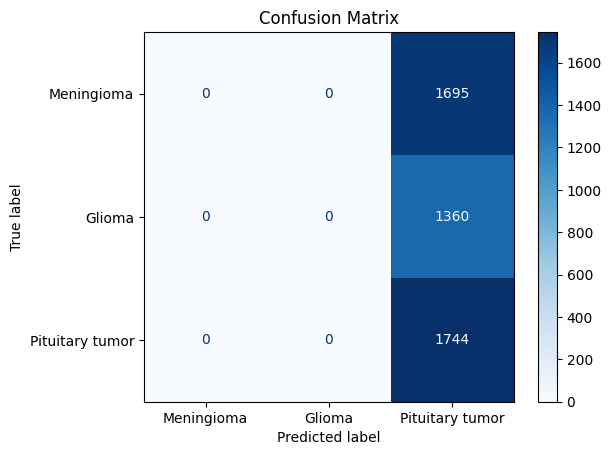

In [107]:
Model_evaluate(ViTS16_Dino_Model,train_dataloader)

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.3555
Test Precision: 0.1124
Test Recall: 0.3333
Test F1 Score: 0.1682
Test Sensitivity: 0.3333


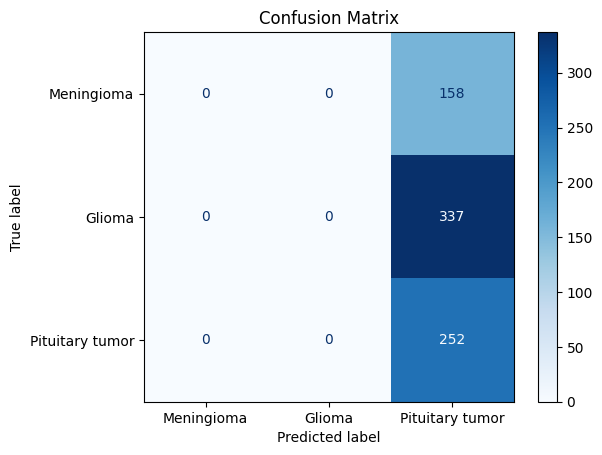

In [108]:
Model_evaluate(ViTS16_Dino_Model,valid_dataloader)

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.2824
Test Precision: 0.0936
Test Recall: 0.3333
Test F1 Score: 0.1461
Test Sensitivity: 0.3333


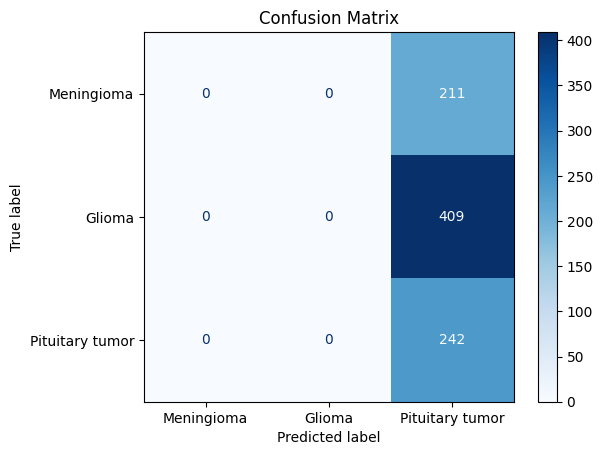

In [109]:
Model_evaluate(ViTS16_Dino_Model,test_dataloader)

## ViT B8 Dino

In [78]:
class ViTB8_Dino(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.Dino = torch.hub.load('facebookresearch/dino:main', 'dino_vitb8')
        self.head = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        features = self.Dino(x)
        return self.head(features)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear Python memory
gc.collect()

ViTB8_Dino_Model = ViTB8_Dino(3)

device = "cuda" if torch.cuda.is_available() else "cpu"

optimizer = torch.optim.Adam(params=ViTB8_Dino_Model.parameters(),
                             lr=1e-3,weight_decay=1e-4)

ViTB8_Dino_Model = ViTB8_Dino_Model.to(device)

scheduler = ExponentialLR(optimizer, gamma=0.9)

loss_fn = torch.nn.CrossEntropyLoss()

ViTB8_Dino_Model_results = train(model=ViTB8_Dino_Model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,scheduler=scheduler, early_stopping=True,
                            patience=10,use_multiple_gpus=True)


Using cache found in /home/aa23798/.cache/torch/hub/facebookresearch_dino_main


Using 3 GPUs


  0%|                                                                  | 0/50 [00:00<?, ?it/s]/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  2%|█                                                      | 1/50 [04:16<3:29:49, 256.94s/it]


Epoch 1, Training Loss: 6.4744, Training Accuracy: 0.3567, Training Precision: 0.3412, Training Recall: 0.3406, Training F1: 0.3245, Test Loss: 1.1091, Test Accuracy: 0.2057, Test Precision: 0.0705, Test Recall: 0.3333, Test F1: 0.1164, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  4%|██▏                                                    | 2/50 [08:26<3:22:10, 252.71s/it]


Epoch 2, Training Loss: 2.9329, Training Accuracy: 0.3524, Training Precision: 0.3503, Training Recall: 0.3311, Training F1: 0.2612, Test Loss: 1.1201, Test Accuracy: 0.2057, Test Precision: 0.0705, Test Recall: 0.3333, Test F1: 0.1164, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  6%|███▎                                                   | 3/50 [12:38<3:17:31, 252.16s/it]


Epoch 3, Training Loss: 2.4498, Training Accuracy: 0.3564, Training Precision: 0.3490, Training Recall: 0.3329, Training F1: 0.2850, Test Loss: 1.1194, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  8%|████▍                                                  | 4/50 [16:40<3:10:21, 248.29s/it]


Epoch 4, Training Loss: 2.2694, Training Accuracy: 0.3548, Training Precision: 0.2162, Training Recall: 0.3260, Training F1: 0.2008, Test Loss: 1.1232, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 10%|█████▌                                                 | 5/50 [21:51<3:23:15, 271.01s/it]


Epoch 5, Training Loss: 2.1825, Training Accuracy: 0.3609, Training Precision: 0.3286, Training Recall: 0.3339, Training F1: 0.2671, Test Loss: 1.1238, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 12%|██████▌                                                | 6/50 [28:17<3:47:15, 309.90s/it]


Epoch 6, Training Loss: 2.1114, Training Accuracy: 0.3636, Training Precision: 0.2372, Training Recall: 0.3337, Training F1: 0.1863, Test Loss: 1.1263, Test Accuracy: 0.2057, Test Precision: 0.0705, Test Recall: 0.3333, Test F1: 0.1164, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 14%|███████▋                                               | 7/50 [34:52<4:02:10, 337.93s/it]


Epoch 7, Training Loss: 2.0912, Training Accuracy: 0.3860, Training Precision: 0.3838, Training Recall: 0.3619, Training F1: 0.3227, Test Loss: 0.9512, Test Accuracy: 0.4258, Test Precision: 0.2941, Test Recall: 0.4890, Test F1: 0.3553, Test Sensitivity: 0.4890


 16%|████████▊                                              | 8/50 [40:04<3:50:40, 329.54s/it]


Epoch 8, Training Loss: 1.9602, Training Accuracy: 0.5105, Training Precision: 0.4898, Training Recall: 0.4910, Training F1: 0.4768, Test Loss: 0.7522, Test Accuracy: 0.7044, Test Precision: 0.6294, Test Recall: 0.6119, Test F1: 0.5810, Test Sensitivity: 0.6119


 18%|█████████▉                                             | 9/50 [43:59<3:24:54, 299.88s/it]


Epoch 9, Training Loss: 1.8031, Training Accuracy: 0.5737, Training Precision: 0.5544, Training Recall: 0.5523, Training F1: 0.5421, Test Loss: 0.7337, Test Accuracy: 0.6992, Test Precision: 0.6208, Test Recall: 0.6222, Test F1: 0.6078, Test Sensitivity: 0.6222


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██████████▊                                           | 10/50 [51:16<3:48:16, 342.42s/it]


Epoch 10, Training Loss: 1.7373, Training Accuracy: 0.5916, Training Precision: 0.5677, Training Recall: 0.5696, Training F1: 0.5600, Test Loss: 0.7821, Test Accuracy: 0.4948, Test Precision: 0.3964, Test Recall: 0.5992, Test F1: 0.4351, Test Sensitivity: 0.5992


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 22%|███████████▉                                          | 11/50 [55:46<3:28:04, 320.12s/it]


Epoch 11, Training Loss: 1.6796, Training Accuracy: 0.5985, Training Precision: 0.5755, Training Recall: 0.5710, Training F1: 0.5522, Test Loss: 0.7129, Test Accuracy: 0.5247, Test Precision: 0.3872, Test Recall: 0.6257, Test F1: 0.4522, Test Sensitivity: 0.6257


 24%|████████████▉                                         | 12/50 [59:49<3:07:55, 296.73s/it]


Epoch 12, Training Loss: 1.6169, Training Accuracy: 0.6179, Training Precision: 0.6002, Training Recall: 0.5970, Training F1: 0.5903, Test Loss: 0.6941, Test Accuracy: 0.6810, Test Precision: 0.6585, Test Recall: 0.6565, Test F1: 0.6527, Test Sensitivity: 0.6565


 26%|█████████████▌                                      | 13/50 [1:03:47<2:51:56, 278.83s/it]


Epoch 13, Training Loss: 1.5588, Training Accuracy: 0.6356, Training Precision: 0.6227, Training Recall: 0.6176, Training F1: 0.6140, Test Loss: 0.6470, Test Accuracy: 0.7383, Test Precision: 0.7095, Test Recall: 0.7028, Test F1: 0.7042, Test Sensitivity: 0.7028


 28%|██████████████▌                                     | 14/50 [1:07:41<2:39:17, 265.49s/it]


Epoch 14, Training Loss: 1.5221, Training Accuracy: 0.6468, Training Precision: 0.6278, Training Recall: 0.6346, Training F1: 0.6289, Test Loss: 0.5694, Test Accuracy: 0.7904, Test Precision: 0.7853, Test Recall: 0.8059, Test F1: 0.7775, Test Sensitivity: 0.8059


 30%|███████████████▌                                    | 15/50 [1:11:38<2:29:43, 256.67s/it]


Epoch 15, Training Loss: 1.4504, Training Accuracy: 0.7064, Training Precision: 0.7182, Training Recall: 0.6904, Training F1: 0.6919, Test Loss: 0.4925, Test Accuracy: 0.8516, Test Precision: 0.8368, Test Recall: 0.8624, Test F1: 0.8396, Test Sensitivity: 0.8624


 32%|████████████████▋                                   | 16/50 [1:15:37<2:22:31, 251.51s/it]


Epoch 16, Training Loss: 1.4107, Training Accuracy: 0.7385, Training Precision: 0.7600, Training Recall: 0.7243, Training F1: 0.7285, Test Loss: 0.5465, Test Accuracy: 0.8047, Test Precision: 0.8145, Test Recall: 0.8367, Test F1: 0.7963, Test Sensitivity: 0.8367


 34%|█████████████████▋                                  | 17/50 [1:19:37<2:16:21, 247.91s/it]


Epoch 17, Training Loss: 1.3637, Training Accuracy: 0.7533, Training Precision: 0.7812, Training Recall: 0.7394, Training F1: 0.7451, Test Loss: 0.5063, Test Accuracy: 0.8385, Test Precision: 0.8324, Test Recall: 0.8572, Test F1: 0.8284, Test Sensitivity: 0.8572


 36%|██████████████████▋                                 | 18/50 [1:23:35<2:10:43, 245.11s/it]


Epoch 18, Training Loss: 1.3346, Training Accuracy: 0.7600, Training Precision: 0.7909, Training Recall: 0.7459, Training F1: 0.7520, Test Loss: 0.5077, Test Accuracy: 0.8177, Test Precision: 0.8178, Test Recall: 0.8403, Test F1: 0.8079, Test Sensitivity: 0.8403


 38%|███████████████████▊                                | 19/50 [1:27:43<2:07:05, 245.98s/it]


Epoch 19, Training Loss: 1.3088, Training Accuracy: 0.7639, Training Precision: 0.7951, Training Recall: 0.7492, Training F1: 0.7548, Test Loss: 0.4769, Test Accuracy: 0.8372, Test Precision: 0.8265, Test Recall: 0.8513, Test F1: 0.8253, Test Sensitivity: 0.8513


 40%|████████████████████▊                               | 20/50 [1:31:38<2:01:13, 242.46s/it]


Epoch 20, Training Loss: 1.2844, Training Accuracy: 0.7723, Training Precision: 0.8016, Training Recall: 0.7582, Training F1: 0.7642, Test Loss: 0.4556, Test Accuracy: 0.8281, Test Precision: 0.8191, Test Recall: 0.8439, Test F1: 0.8162, Test Sensitivity: 0.8439


 42%|█████████████████████▊                              | 21/50 [1:35:34<1:56:19, 240.68s/it]


Epoch 21, Training Loss: 1.2662, Training Accuracy: 0.7710, Training Precision: 0.8013, Training Recall: 0.7572, Training F1: 0.7635, Test Loss: 0.4798, Test Accuracy: 0.8359, Test Precision: 0.8218, Test Recall: 0.8426, Test F1: 0.8223, Test Sensitivity: 0.8426


 44%|██████████████████████▉                             | 22/50 [1:39:31<1:51:49, 239.64s/it]


Epoch 22, Training Loss: 1.2513, Training Accuracy: 0.7752, Training Precision: 0.8033, Training Recall: 0.7619, Training F1: 0.7683, Test Loss: 0.4574, Test Accuracy: 0.8385, Test Precision: 0.8242, Test Recall: 0.8488, Test F1: 0.8254, Test Sensitivity: 0.8488


 46%|███████████████████████▉                            | 23/50 [1:43:25<1:47:05, 238.00s/it]


Epoch 23, Training Loss: 1.2447, Training Accuracy: 0.7750, Training Precision: 0.8045, Training Recall: 0.7607, Training F1: 0.7667, Test Loss: 0.4576, Test Accuracy: 0.8346, Test Precision: 0.8233, Test Recall: 0.8478, Test F1: 0.8222, Test Sensitivity: 0.8478


 48%|████████████████████████▉                           | 24/50 [1:47:23<1:43:02, 237.78s/it]


Epoch 24, Training Loss: 1.2235, Training Accuracy: 0.7773, Training Precision: 0.8064, Training Recall: 0.7637, Training F1: 0.7701, Test Loss: 0.4521, Test Accuracy: 0.8294, Test Precision: 0.8187, Test Recall: 0.8433, Test F1: 0.8169, Test Sensitivity: 0.8433


 50%|██████████████████████████                          | 25/50 [1:51:16<1:38:27, 236.30s/it]


Epoch 25, Training Loss: 1.2085, Training Accuracy: 0.7806, Training Precision: 0.8092, Training Recall: 0.7669, Training F1: 0.7732, Test Loss: 0.4534, Test Accuracy: 0.8333, Test Precision: 0.8242, Test Recall: 0.8483, Test F1: 0.8216, Test Sensitivity: 0.8483


 52%|███████████████████████████                         | 26/50 [1:55:17<1:35:07, 237.83s/it]


Epoch 26, Training Loss: 1.2013, Training Accuracy: 0.7856, Training Precision: 0.8172, Training Recall: 0.7715, Training F1: 0.7781, Test Loss: 0.4759, Test Accuracy: 0.8333, Test Precision: 0.8192, Test Recall: 0.8416, Test F1: 0.8200, Test Sensitivity: 0.8416


 54%|████████████████████████████                        | 27/50 [1:59:13<1:31:00, 237.41s/it]


Epoch 27, Training Loss: 1.1857, Training Accuracy: 0.7835, Training Precision: 0.8139, Training Recall: 0.7697, Training F1: 0.7762, Test Loss: 0.4792, Test Accuracy: 0.8307, Test Precision: 0.8178, Test Recall: 0.8386, Test F1: 0.8173, Test Sensitivity: 0.8386


 56%|█████████████████████████████                       | 28/50 [2:03:06<1:26:29, 235.87s/it]


Epoch 28, Training Loss: 1.1781, Training Accuracy: 0.7848, Training Precision: 0.8154, Training Recall: 0.7713, Training F1: 0.7781, Test Loss: 0.4571, Test Accuracy: 0.8333, Test Precision: 0.8189, Test Recall: 0.8437, Test F1: 0.8202, Test Sensitivity: 0.8437


 58%|██████████████████████████████▏                     | 29/50 [2:07:02<1:22:33, 235.88s/it]


Epoch 29, Training Loss: 1.1680, Training Accuracy: 0.7918, Training Precision: 0.8218, Training Recall: 0.7779, Training F1: 0.7843, Test Loss: 0.4678, Test Accuracy: 0.8333, Test Precision: 0.8186, Test Recall: 0.8434, Test F1: 0.8202, Test Sensitivity: 0.8434


 60%|███████████████████████████████▏                    | 30/50 [2:11:13<1:20:11, 240.60s/it]


Epoch 30, Training Loss: 1.1658, Training Accuracy: 0.7845, Training Precision: 0.8136, Training Recall: 0.7707, Training F1: 0.7770, Test Loss: 0.4603, Test Accuracy: 0.8242, Test Precision: 0.8133, Test Recall: 0.8397, Test F1: 0.8116, Test Sensitivity: 0.8397


 62%|████████████████████████████████▏                   | 31/50 [2:15:22<1:17:00, 243.19s/it]


Epoch 31, Training Loss: 1.1571, Training Accuracy: 0.7900, Training Precision: 0.8219, Training Recall: 0.7761, Training F1: 0.7828, Test Loss: 0.4828, Test Accuracy: 0.8294, Test Precision: 0.8147, Test Recall: 0.8361, Test F1: 0.8153, Test Sensitivity: 0.8361


 64%|█████████████████████████████████▎                  | 32/50 [2:20:27<1:18:28, 261.57s/it]


Epoch 32, Training Loss: 1.1506, Training Accuracy: 0.7920, Training Precision: 0.8216, Training Recall: 0.7778, Training F1: 0.7840, Test Loss: 0.4840, Test Accuracy: 0.8268, Test Precision: 0.8148, Test Recall: 0.8365, Test F1: 0.8137, Test Sensitivity: 0.8365


 66%|██████████████████████████████████▎                 | 33/50 [2:25:49<1:19:15, 279.73s/it]


Epoch 33, Training Loss: 1.1392, Training Accuracy: 0.7916, Training Precision: 0.8224, Training Recall: 0.7778, Training F1: 0.7844, Test Loss: 0.4744, Test Accuracy: 0.8333, Test Precision: 0.8164, Test Recall: 0.8407, Test F1: 0.8192, Test Sensitivity: 0.8407


 66%|██████████████████████████████████▎                 | 33/50 [2:30:30<1:17:32, 273.66s/it]

Early stopping at epoch 34


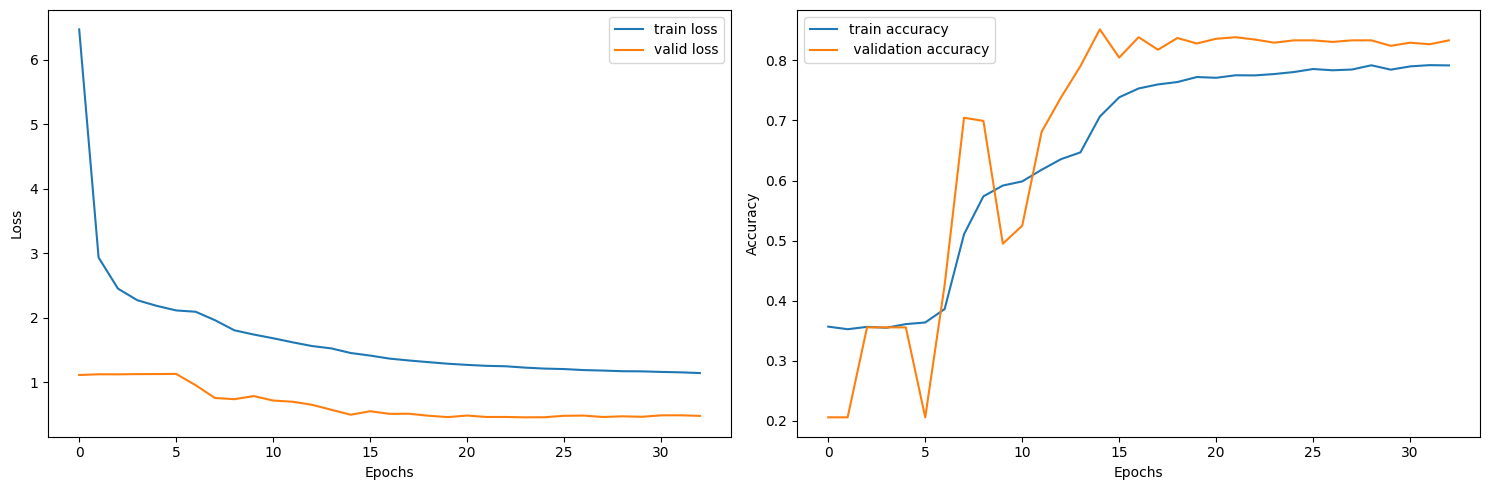

In [79]:
loss_and_acc_plots(ViTB8_Dino_Model_results, save_result=True)

In [80]:
os.makedirs("/home/aa23798/Project/Best Models/ViTB8_Dino/", exist_ok=True)

In [81]:
!cp "best_model.pth" "/home/aa23798/Project/Best Models/ViTB8_Dino/"
!cp "Result.csv" "/home/aa23798/Project/Best Models/ViTB8_Dino/"

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/torch/nn/modules/module.py:1898: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


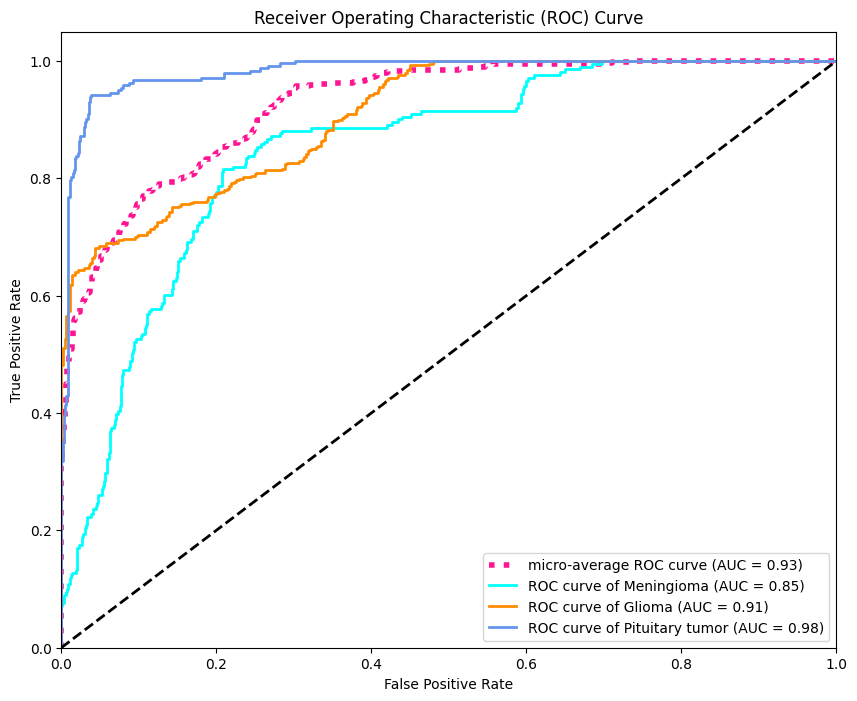

AUC Scores:
Meningioma: 0.8471
Glioma: 0.9068
Pituitary tumor: 0.9828
Micro-average: 0.9253


In [82]:
ViTB8_Dino_Model.state_dict(torch.load("/home/aa23798/Project/best_model.pth"))
plot_roc_auc(ViTB8_Dino_Model, test_dataloader, device)

Test Accuracy: 0.7993
Test Precision: 0.8309
Test Recall: 0.7859
Test F1 Score: 0.7929
Test Sensitivity: 0.7859


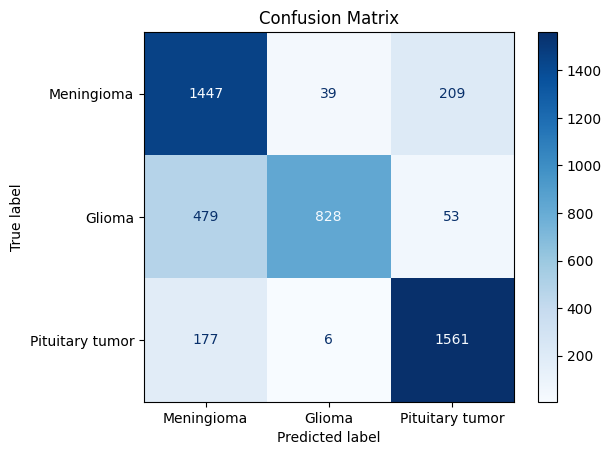

In [83]:
Model_evaluate(ViTB8_Dino_Model,train_dataloader)

Test Accuracy: 0.8229
Test Precision: 0.8112
Test Recall: 0.8324
Test F1 Score: 0.8097
Test Sensitivity: 0.8324


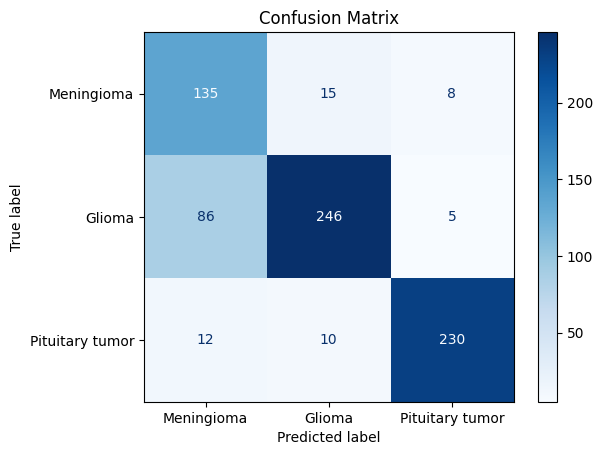

In [84]:
Model_evaluate(ViTB8_Dino_Model,valid_dataloader)

Test Accuracy: 0.7728
Test Precision: 0.7912
Test Recall: 0.7955
Test F1 Score: 0.7766
Test Sensitivity: 0.7955


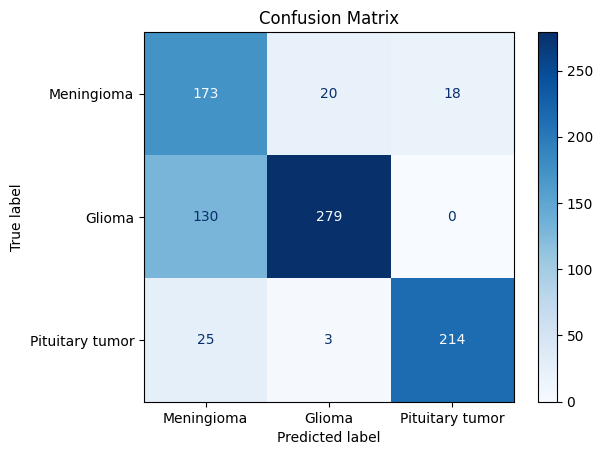

In [85]:
Model_evaluate(ViTB8_Dino_Model,test_dataloader)

## ViT B16 Dino

In [89]:
class ViTB16_Dino(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.Dino = torch.hub.load('facebookresearch/dino:main', 'dino_vitb16')
        self.head = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        features = self.Dino(x)
        return self.head(features)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear Python memory
gc.collect()

ViTB16_Dino_Model = ViTB16_Dino(3)

device = "cuda" if torch.cuda.is_available() else "cpu"

optimizer = torch.optim.Adam(params=ViTB16_Dino_Model.parameters(),
                             lr=1e-3,weight_decay=1e-4)

ViTB16_Dino_Model = ViTB16_Dino_Model.to(device)

scheduler = ExponentialLR(optimizer, gamma=0.9)

loss_fn = torch.nn.CrossEntropyLoss()

ViTB16_Dino_Model_results = train(model=ViTB16_Dino_Model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,scheduler=scheduler, early_stopping=True,
                            patience=10,use_multiple_gpus=True)


Using cache found in /home/aa23798/.cache/torch/hub/facebookresearch_dino_main


Using 3 GPUs


  0%|                                                                  | 0/50 [00:00<?, ?it/s]/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  2%|█                                                      | 1/50 [01:55<1:34:43, 115.99s/it]


Epoch 1, Training Loss: 6.4913, Training Accuracy: 0.3517, Training Precision: 0.3329, Training Recall: 0.3354, Training F1: 0.3205, Test Loss: 1.1083, Test Accuracy: 0.4102, Test Precision: 0.2485, Test Recall: 0.4471, Test F1: 0.3190, Test Sensitivity: 0.4471


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  4%|██▏                                                    | 2/50 [03:40<1:27:16, 109.10s/it]


Epoch 2, Training Loss: 3.4993, Training Accuracy: 0.3541, Training Precision: 0.3526, Training Recall: 0.3307, Training F1: 0.2769, Test Loss: 1.1183, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  6%|███▎                                                   | 3/50 [05:23<1:23:17, 106.33s/it]


Epoch 3, Training Loss: 2.9855, Training Accuracy: 0.3573, Training Precision: 0.3981, Training Recall: 0.3291, Training F1: 0.2339, Test Loss: 1.1247, Test Accuracy: 0.3555, Test Precision: 0.1124, Test Recall: 0.3333, Test F1: 0.1682, Test Sensitivity: 0.3333


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  8%|████▍                                                  | 4/50 [07:06<1:20:30, 105.01s/it]


Epoch 4, Training Loss: 2.8658, Training Accuracy: 0.3499, Training Precision: 0.3171, Training Recall: 0.3267, Training F1: 0.2835, Test Loss: 1.1176, Test Accuracy: 0.2057, Test Precision: 0.0705, Test Recall: 0.3333, Test F1: 0.1164, Test Sensitivity: 0.3333


 10%|█████▌                                                 | 5/50 [08:56<1:20:03, 106.75s/it]


Epoch 5, Training Loss: 2.7709, Training Accuracy: 0.4186, Training Precision: 0.4118, Training Recall: 0.3986, Training F1: 0.3805, Test Loss: 0.9689, Test Accuracy: 0.6458, Test Precision: 0.5848, Test Recall: 0.5885, Test F1: 0.5861, Test Sensitivity: 0.5885


 12%|██████▌                                                | 6/50 [10:42<1:18:09, 106.59s/it]


Epoch 6, Training Loss: 2.5705, Training Accuracy: 0.5441, Training Precision: 0.5291, Training Recall: 0.5297, Training F1: 0.5227, Test Loss: 0.7414, Test Accuracy: 0.6771, Test Precision: 0.5293, Test Recall: 0.5741, Test F1: 0.5332, Test Sensitivity: 0.5741


 14%|███████▋                                               | 7/50 [12:31<1:16:58, 107.41s/it]


Epoch 7, Training Loss: 2.4175, Training Accuracy: 0.6122, Training Precision: 0.6005, Training Recall: 0.6030, Training F1: 0.5994, Test Loss: 0.6512, Test Accuracy: 0.7096, Test Precision: 0.6788, Test Recall: 0.6649, Test F1: 0.6697, Test Sensitivity: 0.6649


 16%|████████▊                                              | 8/50 [14:16<1:14:44, 106.78s/it]


Epoch 8, Training Loss: 2.3232, Training Accuracy: 0.6722, Training Precision: 0.6758, Training Recall: 0.6634, Training F1: 0.6661, Test Loss: 0.6443, Test Accuracy: 0.7982, Test Precision: 0.7944, Test Recall: 0.8252, Test F1: 0.7880, Test Sensitivity: 0.8252


 18%|█████████▉                                             | 9/50 [16:00<1:12:17, 105.79s/it]


Epoch 9, Training Loss: 2.2239, Training Accuracy: 0.6975, Training Precision: 0.6959, Training Recall: 0.6899, Training F1: 0.6913, Test Loss: 0.5373, Test Accuracy: 0.7943, Test Precision: 0.7777, Test Recall: 0.7945, Test F1: 0.7784, Test Sensitivity: 0.7945


 20%|██████████▊                                           | 10/50 [17:44<1:10:07, 105.20s/it]


Epoch 10, Training Loss: 2.1354, Training Accuracy: 0.7162, Training Precision: 0.7196, Training Recall: 0.7074, Training F1: 0.7101, Test Loss: 0.5499, Test Accuracy: 0.7695, Test Precision: 0.7654, Test Recall: 0.7686, Test F1: 0.7538, Test Sensitivity: 0.7686


 22%|███████████▉                                          | 11/50 [19:31<1:08:46, 105.82s/it]


Epoch 11, Training Loss: 2.0993, Training Accuracy: 0.7043, Training Precision: 0.7093, Training Recall: 0.6949, Training F1: 0.6980, Test Loss: 0.4702, Test Accuracy: 0.7865, Test Precision: 0.7729, Test Recall: 0.7830, Test F1: 0.7703, Test Sensitivity: 0.7830


 24%|████████████▉                                         | 12/50 [21:18<1:07:15, 106.19s/it]


Epoch 12, Training Loss: 2.0328, Training Accuracy: 0.7262, Training Precision: 0.7351, Training Recall: 0.7161, Training F1: 0.7200, Test Loss: 0.5323, Test Accuracy: 0.7578, Test Precision: 0.7671, Test Recall: 0.7642, Test F1: 0.7454, Test Sensitivity: 0.7642


 26%|██████████████                                        | 13/50 [23:03<1:05:13, 105.76s/it]


Epoch 13, Training Loss: 1.9850, Training Accuracy: 0.7320, Training Precision: 0.7411, Training Recall: 0.7224, Training F1: 0.7263, Test Loss: 0.4692, Test Accuracy: 0.7943, Test Precision: 0.7841, Test Recall: 0.7988, Test F1: 0.7803, Test Sensitivity: 0.7988


 28%|███████████████                                       | 14/50 [24:48<1:03:15, 105.43s/it]


Epoch 14, Training Loss: 1.9420, Training Accuracy: 0.7400, Training Precision: 0.7482, Training Recall: 0.7296, Training F1: 0.7334, Test Loss: 0.4493, Test Accuracy: 0.8320, Test Precision: 0.8183, Test Recall: 0.8526, Test F1: 0.8220, Test Sensitivity: 0.8526


 30%|████████████████▏                                     | 15/50 [26:31<1:01:07, 104.79s/it]


Epoch 15, Training Loss: 1.9166, Training Accuracy: 0.7456, Training Precision: 0.7534, Training Recall: 0.7358, Training F1: 0.7396, Test Loss: 0.4516, Test Accuracy: 0.8177, Test Precision: 0.7987, Test Recall: 0.8249, Test F1: 0.8040, Test Sensitivity: 0.8249


 32%|█████████████████▉                                      | 16/50 [28:14<59:10, 104.42s/it]


Epoch 16, Training Loss: 1.8755, Training Accuracy: 0.7525, Training Precision: 0.7575, Training Recall: 0.7445, Training F1: 0.7479, Test Loss: 0.4884, Test Accuracy: 0.7988, Test Precision: 0.7943, Test Recall: 0.7901, Test F1: 0.7891, Test Sensitivity: 0.7901


 34%|███████████████████                                     | 17/50 [29:58<57:19, 104.24s/it]


Epoch 17, Training Loss: 1.8407, Training Accuracy: 0.7650, Training Precision: 0.7698, Training Recall: 0.7566, Training F1: 0.7598, Test Loss: 0.4314, Test Accuracy: 0.8411, Test Precision: 0.8190, Test Recall: 0.8207, Test F1: 0.8195, Test Sensitivity: 0.8207


 36%|████████████████████▏                                   | 18/50 [31:44<55:47, 104.60s/it]


Epoch 18, Training Loss: 1.8139, Training Accuracy: 0.7678, Training Precision: 0.7717, Training Recall: 0.7599, Training F1: 0.7631, Test Loss: 0.4735, Test Accuracy: 0.8320, Test Precision: 0.8109, Test Recall: 0.8228, Test F1: 0.8142, Test Sensitivity: 0.8228


 38%|█████████████████████▎                                  | 19/50 [33:29<54:12, 104.93s/it]


Epoch 19, Training Loss: 1.7893, Training Accuracy: 0.7710, Training Precision: 0.7776, Training Recall: 0.7620, Training F1: 0.7658, Test Loss: 0.5062, Test Accuracy: 0.8235, Test Precision: 0.8184, Test Recall: 0.8124, Test F1: 0.8142, Test Sensitivity: 0.8124


 40%|██████████████████████▍                                 | 20/50 [35:15<52:35, 105.17s/it]


Epoch 20, Training Loss: 1.7597, Training Accuracy: 0.7835, Training Precision: 0.7906, Training Recall: 0.7754, Training F1: 0.7794, Test Loss: 0.4485, Test Accuracy: 0.8438, Test Precision: 0.8264, Test Recall: 0.8419, Test F1: 0.8291, Test Sensitivity: 0.8419


 42%|███████████████████████▌                                | 21/50 [37:01<50:52, 105.25s/it]


Epoch 21, Training Loss: 1.7396, Training Accuracy: 0.7856, Training Precision: 0.7901, Training Recall: 0.7779, Training F1: 0.7813, Test Loss: 0.4689, Test Accuracy: 0.8313, Test Precision: 0.8277, Test Recall: 0.8332, Test F1: 0.8276, Test Sensitivity: 0.8332


 44%|████████████████████████▋                               | 22/50 [38:46<49:06, 105.22s/it]


Epoch 22, Training Loss: 1.7185, Training Accuracy: 0.7931, Training Precision: 0.7971, Training Recall: 0.7860, Training F1: 0.7892, Test Loss: 0.5068, Test Accuracy: 0.8261, Test Precision: 0.8245, Test Recall: 0.8413, Test F1: 0.8264, Test Sensitivity: 0.8413


 46%|█████████████████████████▊                              | 23/50 [40:30<47:11, 104.88s/it]


Epoch 23, Training Loss: 1.7042, Training Accuracy: 0.7981, Training Precision: 0.8033, Training Recall: 0.7905, Training F1: 0.7942, Test Loss: 0.4948, Test Accuracy: 0.8196, Test Precision: 0.8189, Test Recall: 0.8294, Test F1: 0.8176, Test Sensitivity: 0.8294


 48%|██████████████████████████▉                             | 24/50 [42:14<45:23, 104.74s/it]


Epoch 24, Training Loss: 1.6813, Training Accuracy: 0.7977, Training Precision: 0.8048, Training Recall: 0.7897, Training F1: 0.7938, Test Loss: 0.4916, Test Accuracy: 0.8496, Test Precision: 0.8485, Test Recall: 0.8367, Test F1: 0.8418, Test Sensitivity: 0.8367


 50%|████████████████████████████                            | 25/50 [43:59<43:38, 104.75s/it]


Epoch 25, Training Loss: 1.6664, Training Accuracy: 0.8054, Training Precision: 0.8084, Training Recall: 0.7987, Training F1: 0.8017, Test Loss: 0.4682, Test Accuracy: 0.8480, Test Precision: 0.8371, Test Recall: 0.8496, Test F1: 0.8408, Test Sensitivity: 0.8496


 52%|█████████████████████████████                           | 26/50 [45:45<42:02, 105.11s/it]


Epoch 26, Training Loss: 1.6503, Training Accuracy: 0.8062, Training Precision: 0.8109, Training Recall: 0.7990, Training F1: 0.8026, Test Loss: 0.5001, Test Accuracy: 0.8557, Test Precision: 0.8415, Test Recall: 0.8504, Test F1: 0.8448, Test Sensitivity: 0.8504


 52%|█████████████████████████████                           | 26/50 [47:33<43:53, 109.74s/it]

Early stopping at epoch 27


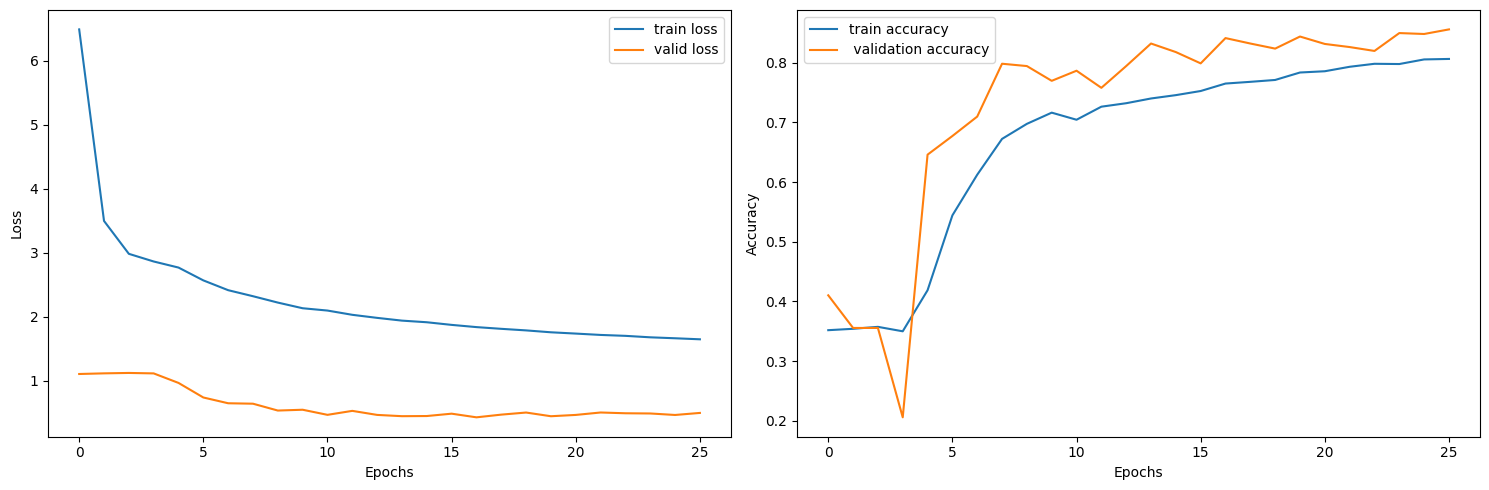

In [90]:
loss_and_acc_plots(ViTB16_Dino_Model_results, save_result=True)

In [91]:
os.makedirs("/home/aa23798/Project/Best Models/ViTB16_Dino/", exist_ok=True)

In [92]:
!cp "best_model.pth" "/home/aa23798/Project/Best Models/ViTB16_Dino/"
!cp "Result.csv" "/home/aa23798/Project/Best Models/ViTB16_Dino/"

/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/torch/nn/modules/module.py:1898: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


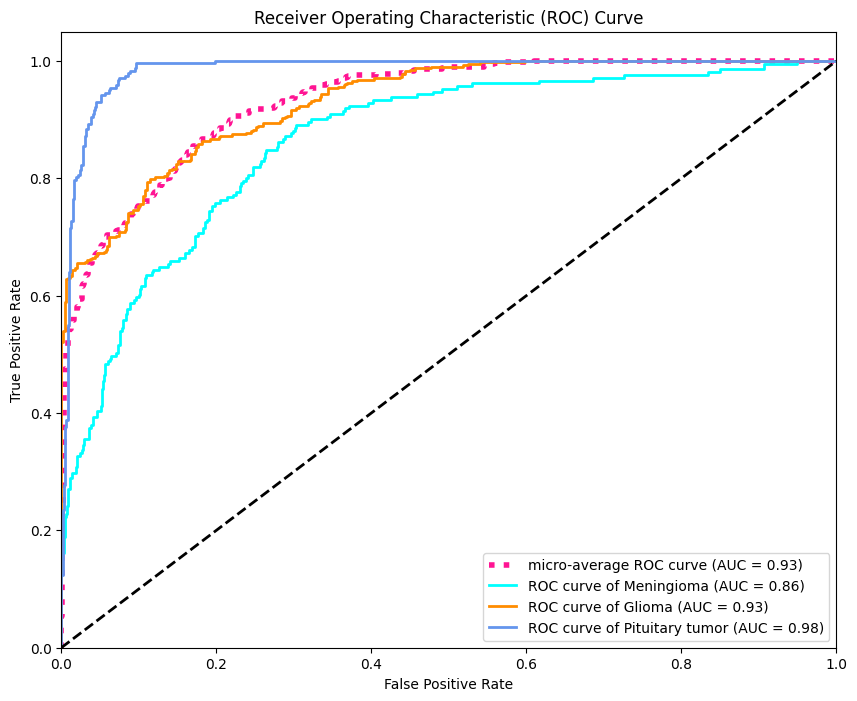

AUC Scores:
Meningioma: 0.8640
Glioma: 0.9308
Pituitary tumor: 0.9850
Micro-average: 0.9316


In [93]:
ViTB16_Dino_Model.state_dict(torch.load("/home/aa23798/Project/best_model.pth"))
plot_roc_auc(ViTB16_Dino_Model, test_dataloader, device)

Test Accuracy: 0.8141
Test Precision: 0.8329
Test Recall: 0.8023
Test F1 Score: 0.8078
Test Sensitivity: 0.8023


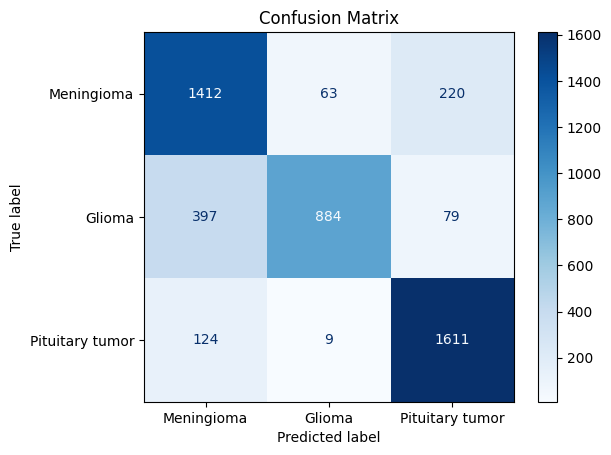

In [94]:
Model_evaluate(ViTB16_Dino_Model,train_dataloader)

Test Accuracy: 0.8378
Test Precision: 0.8357
Test Recall: 0.8580
Test F1 Score: 0.8398
Test Sensitivity: 0.8580


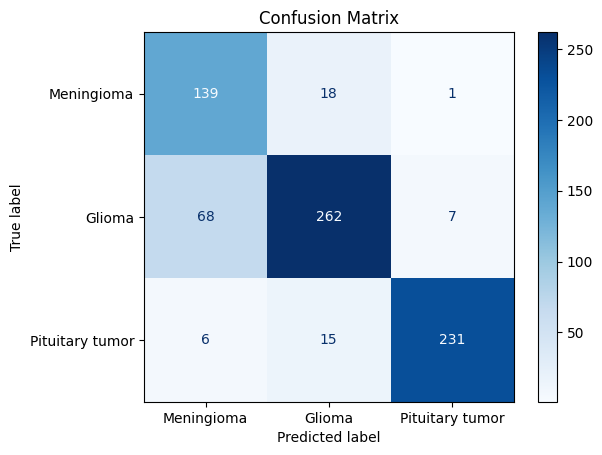

In [95]:
Model_evaluate(ViTB16_Dino_Model,valid_dataloader)

Test Accuracy: 0.7774
Test Precision: 0.7856
Test Recall: 0.7996
Test F1 Score: 0.7785
Test Sensitivity: 0.7996


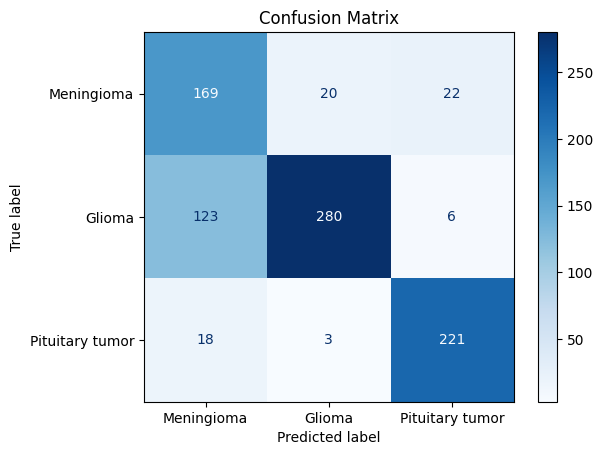

In [96]:
Model_evaluate(ViTB16_Dino_Model,test_dataloader)

# Results

**Table 1: Training Results**
$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Model} & \text{Accuracy} & \text{Precision} & \text{Recall} & \text{F1-score} & \text{Sensitivity} \\
\hline
\text{ViT-S/16} & \text{82.70\%} & \text{83.35\%} & \text{82.03\%} & \text{82.41\%} & \text{82.03\%} \\
\hline
\text{ViT-B/8} & \textbf{88.58\%} & \textbf{89.19\%} & \textbf{87.89\%} & \textbf{88.29\%} & \textbf{87.89\%} \\
\hline
\text{ViT-B/16} & \text{82.66\%} & \text{84.60\%} & \text{81.44\%} & \text{82.02\%} & \text{81.44\%} \\
\hline
\text{ViT-S/16 Dino} & \text{36.34\%} & \text{12.11\%} & \text{33.33\%} & \text{17.77\%} & \text{33.33\%} \\
\hline
\text{{ViT-B/8 Dino}} & \text{79.93\%} & \text{83.09\%} & \text{78.59\%} & \text{79.29\%} & \text{78.59\%} \\
\hline
\text{ViT-B/16 Dino} & \text{81.41\%} & \text{83.29\%} & \text{80.23\%} & \text{80.78\%} & \text{80.23\%} \\
\hline
\end{array}
$$




**Table 2: Validataion Results**
$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Model} & \text{Accuracy} & \text{Precision} & \text{Recall} & \text{F1-score} & \text{Sensitivity} \\
\hline
\text{ViT-S/16} & \text{84.51\%} & \text{83.44\%} & \text{84.70\%} & \text{83.24\%} & \text{84.70\%} \\
\hline
\text{ViT-B/8} & \textbf{83.98\%} & \textbf{82.35\%} & \textbf{81.58\%} & \textbf{81.76\%} & \textbf{81.58\%} \\
\hline
\text{ViT-B/16} & \text{82.81\%} & \text{81.36\%} & \text{82.02\%} & \text{81.22\%} & \text{82.02\%} \\
\hline
\text{ViT-S/16 Dino} & \text{35.55\%} & \text{11.24\%} & \text{33.33\%} & \text{16.82\%} & \text{33.33\%} \\
\hline
\text{{ViT-B/8 Dino}} & \text{82.29\%} & \text{81.12\%} & \text{83.24\%} & \text{80.97\%} & \text{83.24\%} \\
\hline
\text{ViT-B/16 Dino} & \text{83.78\%} & \text{83.57\%} & \text{85.80\%} & \text{83.98\%} & \text{85.80\%} \\
\hline
\end{array}
$$


**Table 3: Testing Results**

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Model} & \text{Accuracy} & \text{Precision} & \text{Recall} & \text{F1-score} & \text{Sensitivity} \\
\hline
\text{ViT-S/16} & \textbf{81.94\%} & 81.04\% & \textbf{82.47\%} & \textbf{81.39\%} & \textbf{82.47\%} \\
\hline
\text{ViT-B/8} & 80.29\% & 80.23\% & 80.38\% & 79.79\% & 80.38\% \\
\hline
\text{ViT-B/16} & 80.03\% & \textbf{81.58\%} & 81.23\% & 79.90\% & 81.23\% \\
\hline
\text{ViT-S/16 Dino} & 28.24\% & 9.36\% & 33.33\% & 14.61\% & 33.33\% \\
\hline
\text{ViT-B/8 Dino} & 77.28\% & 79.12\% & 79.55\% & 77.66\% & 79.55\% \\
\hline
\text{ViT-B/16 Dino} & 77.74\% & 78.56\% & 79.96\% & 77.85\% & 79.96\% \\
\hline
\end{array}
$$


**Table 4: AUC Curve Results**

$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{Model} & \text{AUC (Meningioma)} & \text{AUC (Glioma)} & \text{AUC (Pituitary)} \\
\hline
\text{ViT-S/16} & \text{0.8726} & \textbf{0.9440} & \text{0.9832} \\
\hline
\text{ViT-B/8} & \textbf{0.8940} & \text{0.9313} & \text{0.9811} \\
\hline
\text{ViT-B/16} & \text{0.8695} & \text{0.9437} & \text{0.9825} \\
\hline
\text{ViT-S/16 Dino} & \text{0.5000} & \text{0.5000} & \text{0.5000} \\
\hline
\text{ViT-B/8 Dino} & \text{0.8471} & \text{0.9068} & \text{0.9828} \\
\hline
\text{ViT-B/16 Dino} & \text{0.8640} & \text{0.9308} & \textbf{0.9850} \\
\hline
\end{array}
$$
